## **1) IMPORTING OF LIBRARIES**

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Importing pandas 
import pandas as pd

# Importing numpy 
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.style.use("fivethirtyeight")
from pylab import rcParams

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# Importing yfinance libraries to read data
import yfinance as yf

import itertools

# Importing of various functions to perform Linear Regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.svm import SVR

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor # For multicolinearity
from scipy.stats import f_oneway
import statsmodels.api as sm
import scipy.stats as stats

## **2) Collection of Data**

In [2]:
# Companies list
my_companies = ["HINDUNILVR.NS", "HDFCBANK.NS", "BAJFINANCE.NS", "INFY.NS", "TCS.NS", "ICICIBANK.NS", "ITC.NS", "ONGC.NS", "SBIN.NS", "LT.NS"]
choice = int(input("Enter the INDEX value of the company you want to see : "))
ticker = my_companies[choice]
ticker

Enter the INDEX value of the company you want to see : 8


'SBIN.NS'

In [3]:
# Using Ticker we are genarating the periodic updates of data from data source
curr_ticker = yf.Ticker(ticker)
# Period = 2y refers to the period of 2 years
df = curr_ticker.history(period = "2y")

In [4]:
# Reading the data 
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00+05:30,454.922195,469.410163,454.487544,468.589172,27750689,0.0,0.0
2022-03-15 00:00:00+05:30,472.307726,473.756523,464.242752,469.265259,27204899,0.0,0.0
2022-03-16 00:00:00+05:30,476.171215,477.426827,472.694096,475.929749,16211288,0.0,0.0
2022-03-17 00:00:00+05:30,481.966394,486.312784,481.290277,484.767395,22947673,0.0,0.0
2022-03-21 00:00:00+05:30,484.863968,484.863968,472.307730,473.853119,19064060,0.0,0.0


In [5]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-05 00:00:00+05:30,769.500000,786.950012,769.099976,783.950012,18088847,0.0,0.0
2024-03-06 00:00:00+05:30,783.650024,790.299988,772.900024,783.900024,26710525,0.0,0.0
2024-03-07 00:00:00+05:30,790.000000,793.400024,783.000000,788.049988,15497868,0.0,0.0
2024-03-11 00:00:00+05:30,790.000000,792.799988,770.549988,773.700012,16778340,0.0,0.0
2024-03-12 00:00:00+05:30,770.000000,777.750000,757.349976,759.700012,21527951,0.0,0.0


In [6]:
# Checking the dimensions
df.shape

(494, 7)

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [8]:
# Changing of Date format
df.index = df.index.strftime('%Y-%m-%d')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14,454.922195,469.410163,454.487544,468.589172,27750689,0.0,0.0
2022-03-15,472.307726,473.756523,464.242752,469.265259,27204899,0.0,0.0
2022-03-16,476.171215,477.426827,472.694096,475.929749,16211288,0.0,0.0
2022-03-17,481.966394,486.312784,481.290277,484.767395,22947673,0.0,0.0
2022-03-21,484.863968,484.863968,472.307730,473.853119,19064060,0.0,0.0


## **3) Feature Engineering**

In [9]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams["figure.figsize"] = (20, 20)

In [10]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [11]:
# Average of last 50 and 100 days
df["Roll 50"]=df["Close"].rolling(50).mean()

In [12]:
df["Roll 100"]=df["Close"].rolling(100).mean()

In [13]:
# incorporate historical information into the dataset and analyze temporal dependencies(impact of previous behaviour
# on current behaviour) between variables
df["Lag"] = df["Close"].shift(-1)

In [14]:
# RSI that measures the speed and change of price movements
change = df["Close"].diff()
change.dropna(inplace=True)

#The purpose of creating change_up and change_down is to facilitate the calculation of the RSI indicator, which involves comparing the magnitude
#of recent gains to recent losses. By separating positive and negative changes, the code prepares the data for further analysis to compute the RSI.
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

In [15]:
df["RSI 14"]= rsi

In [16]:
# moving average calculation that gives more weight to recent data points while gradually decreasing the weight of older data points
# As we are dealing with daily data we take span of default 12 days as it is for short to intermediate-term analysis
df["EMA 12"] = df["Close"].ewm(span=12, adjust=False).mean()

In [17]:
# MACD is diff between EMA's
EMA_12 = df["Close"].ewm(span=12, adjust=False).mean()
EMA_26 = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD(26-12)"] = EMA_12 - EMA_26
# Siganl line refers when it is overbought and oversold
df["Signal Line"] = df["MACD(26-12)"].ewm(span=9, adjust=False).mean()

In [18]:
# Rate Of Change curve measures the percent change in price from one period to the next
df["ROC"] = (df["Close"] - df["Close"].shift(1)) / df["Close"].shift(1) * 100

In [19]:
df = df.drop(["Dividends","Stock Splits"], axis = 1)

In [20]:
df.tail()

,Open,High,Low,Close,Volume,Roll 50,Roll 100,Lag,RSI 14,EMA 12,MACD(26-12),Signal Line,ROC
Date,,,,,,,,,,,,,
2024-03-05,769.500000,786.950012,769.099976,783.950012,18088847,679.022002,632.368503,783.900024,68.014212,756.464518,28.425010,29.346991,1.541354
2024-03-06,783.650024,790.299988,772.900024,783.900024,26710525,681.965002,634.291003,788.049988,61.770952,760.685365,28.508042,29.179201,-0.006376
2024-03-07,790.000000,793.400024,783.000000,788.049988,15497868,684.965002,636.288003,773.700012,68.234004,764.895307,28.579268,29.059214,0.529400
2024-03-11,790.000000,792.799988,770.549988,773.700012,16778340,687.468003,638.164503,759.700012,57.135813,766.249877,27.164655,28.680302,-1.820947
2024-03-12,770.000000,777.750000,757.349976,759.700012,21527951,689.634003,640.000003,NaN,49.825191,765.242205,24.629962,27.870234,-1.809487


## **4)Data Preprocessing**

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,494.0,5.601053e+02,6.747094e+01,4.298097e+02,5.156791e+02,5.670000e+02,5.936125e+02,7.900000e+02
High,494.0,5.654001e+02,6.821510e+01,4.346390e+02,5.214788e+02,5.707500e+02,5.979552e+02,7.934000e+02
Low,494.0,5.542503e+02,6.704056e+01,4.224900e+02,5.094991e+02,5.615624e+02,5.879910e+02,7.830000e+02
Close,494.0,5.597660e+02,6.769879e+01,4.264137e+02,5.149188e+02,5.657265e+02,5.920747e+02,7.880500e+02
Volume,494.0,1.574608e+07,7.842658e+06,3.692065e+06,1.106654e+07,1.381968e+07,1.815289e+07,7.422243e+07
Roll 50,445.0,5.551869e+02,4.982029e+01,4.532957e+02,5.264694e+02,5.680513e+02,5.852128e+02,6.896340e+02
Roll 100,395.0,5.561921e+02,3.669062e+01,4.723193e+02,5.451755e+02,5.634924e+02,5.823090e+02,6.400000e+02
Lag,493.0,5.599510e+02,6.764252e+01,4.264137e+02,5.151396e+02,5.659031e+02,5.921500e+02,7.880500e+02
RSI 14,480.0,5.492286e+01,1.773680e+01,1.746506e+01,4.045301e+01,5.578645e+01,6.864131e+01,9.425986e+01
EMA 12,494.0,5.564632e+02,6.291035e+01,4.417505e+02,5.148897e+02,5.671607e+02,5.901440e+02,7.662499e+02


In [22]:
df.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume           int64
Roll 50        float64
Roll 100       float64
Lag            float64
RSI 14         float64
EMA 12         float64
MACD(26-12)    float64
Signal Line    float64
ROC            float64
dtype: object

In [23]:
df.index.dtype

dtype('O')

In [24]:
df.index = pd.to_datetime(df.index)

In [25]:
df.index.dtype

dtype('<M8[ns]')

In [26]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Roll 50        49
Roll 100       99
Lag             1
RSI 14         14
EMA 12          0
MACD(26-12)     0
Signal Line     0
ROC             1
dtype: int64

In [27]:
df.shape

(494, 13)

In [28]:
df.dropna(axis=0, inplace=True)

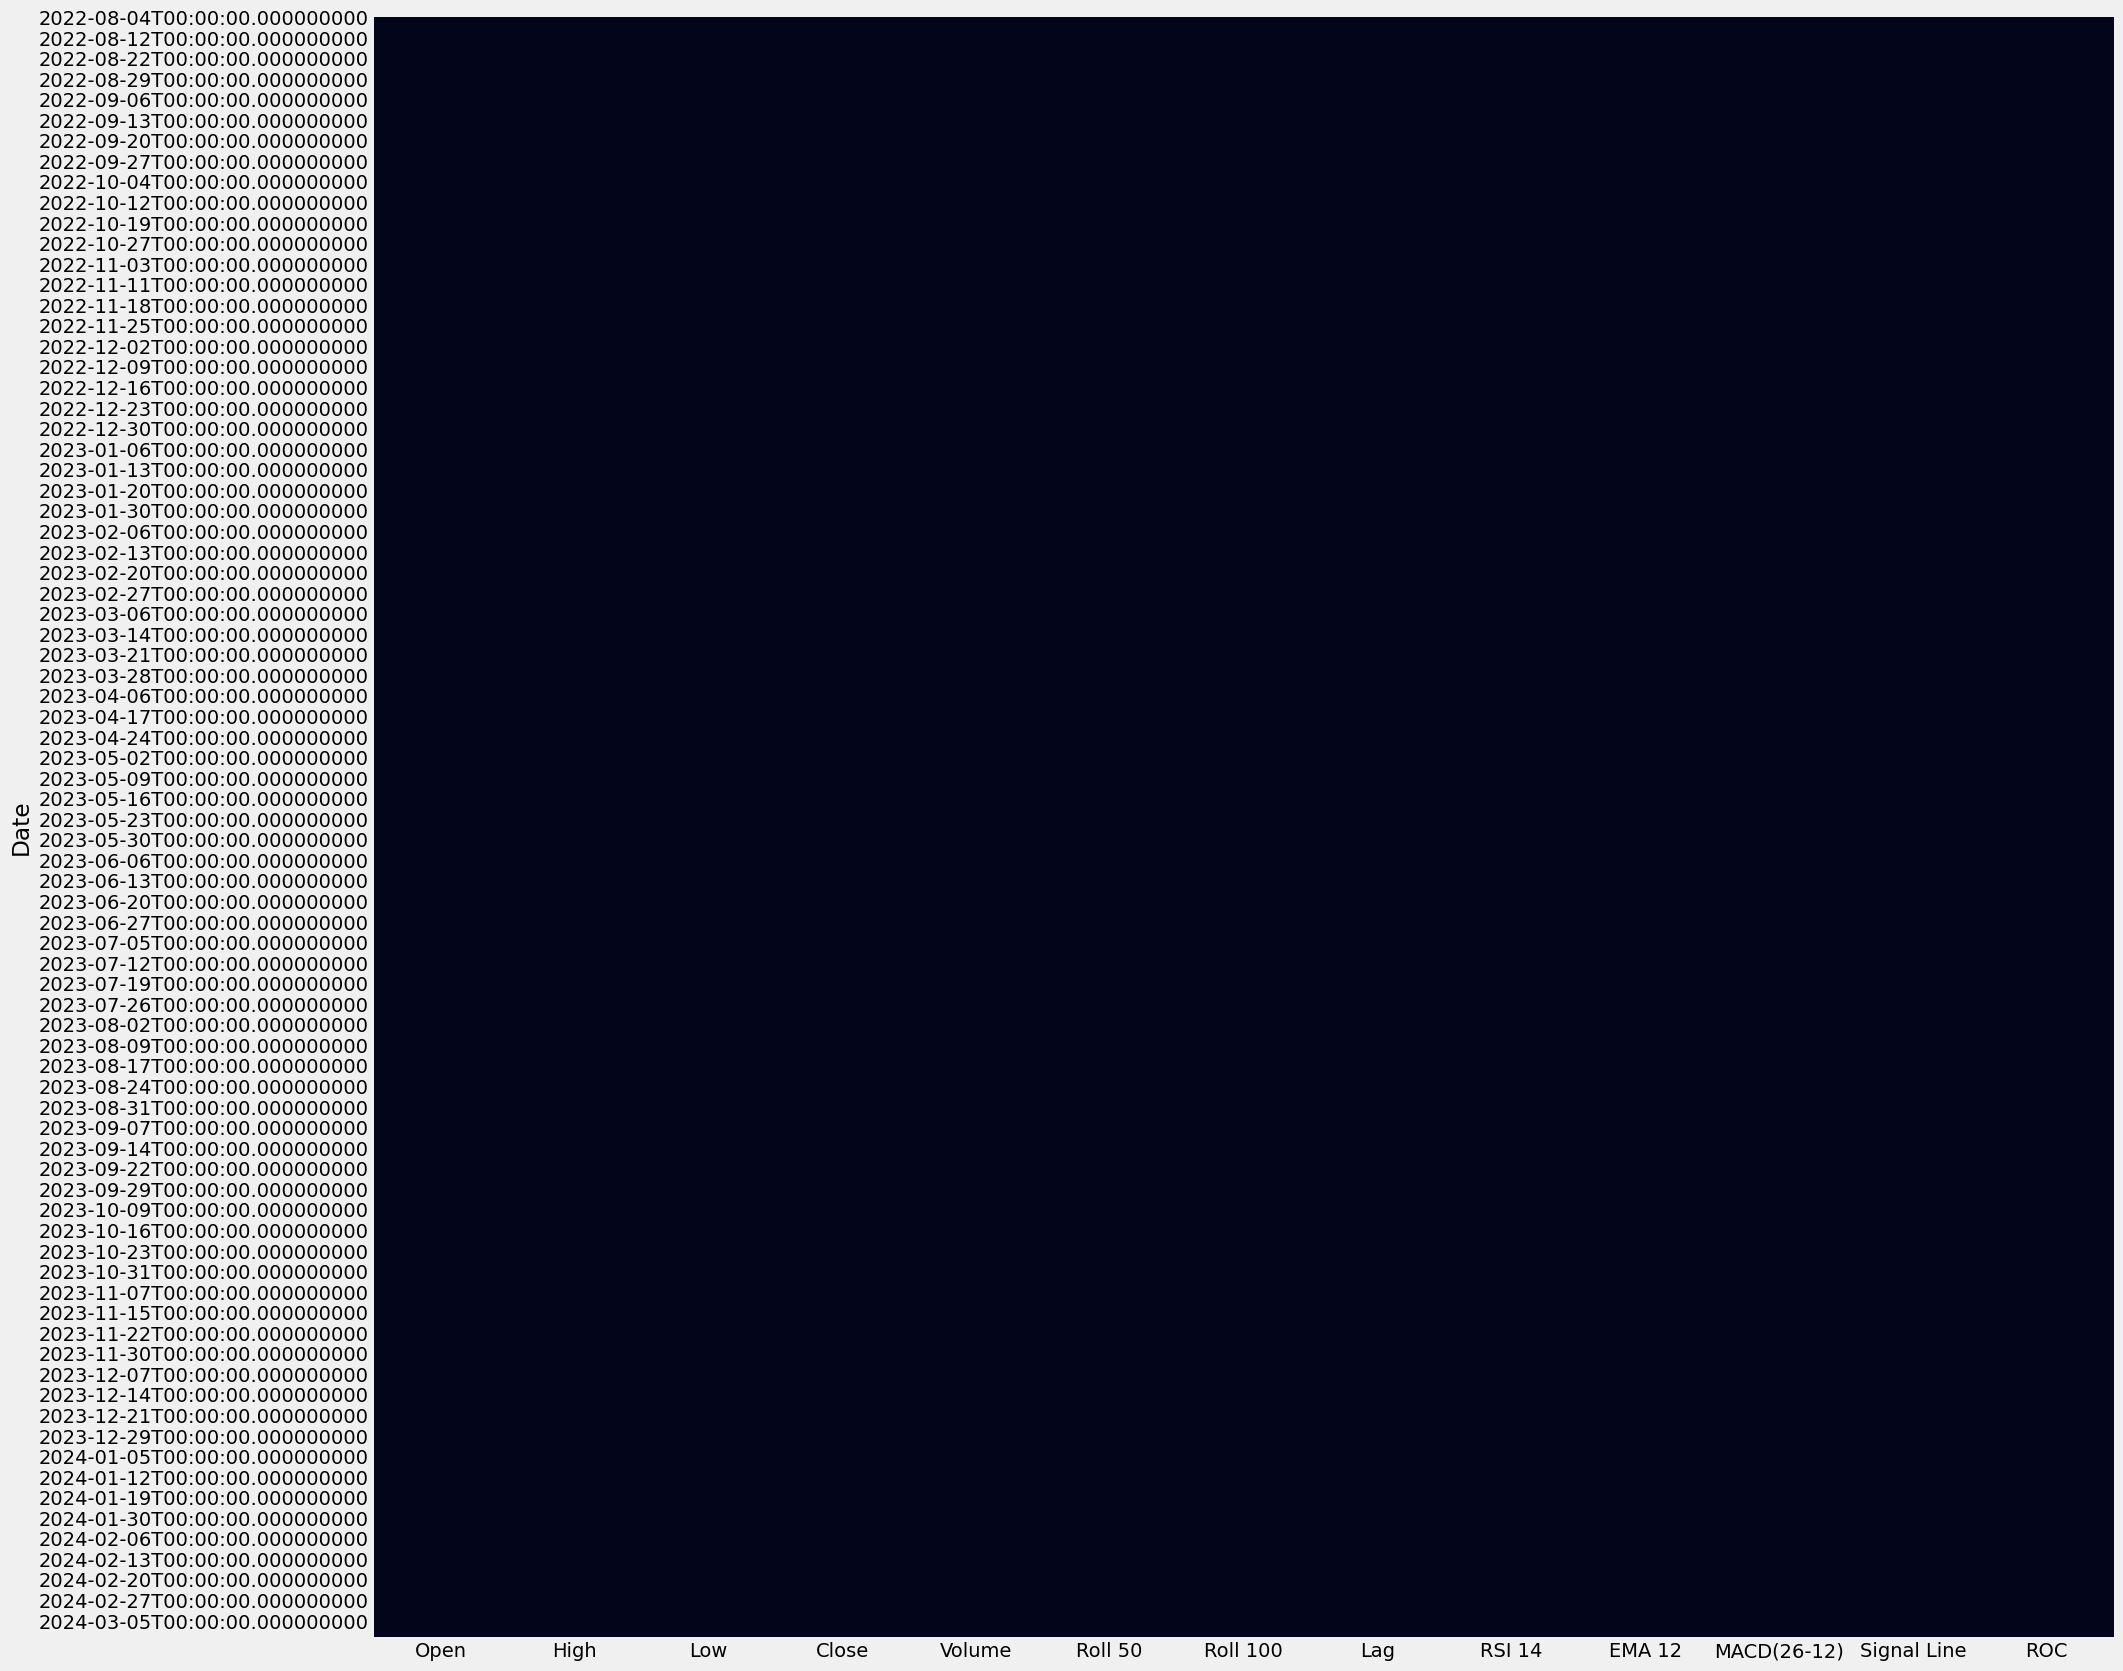

In [29]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## **5) Data Visualization of All the features with Target Variable**

In [30]:
df_sample = df.resample("MS").mean()

In [31]:
df.shape

(394, 13)

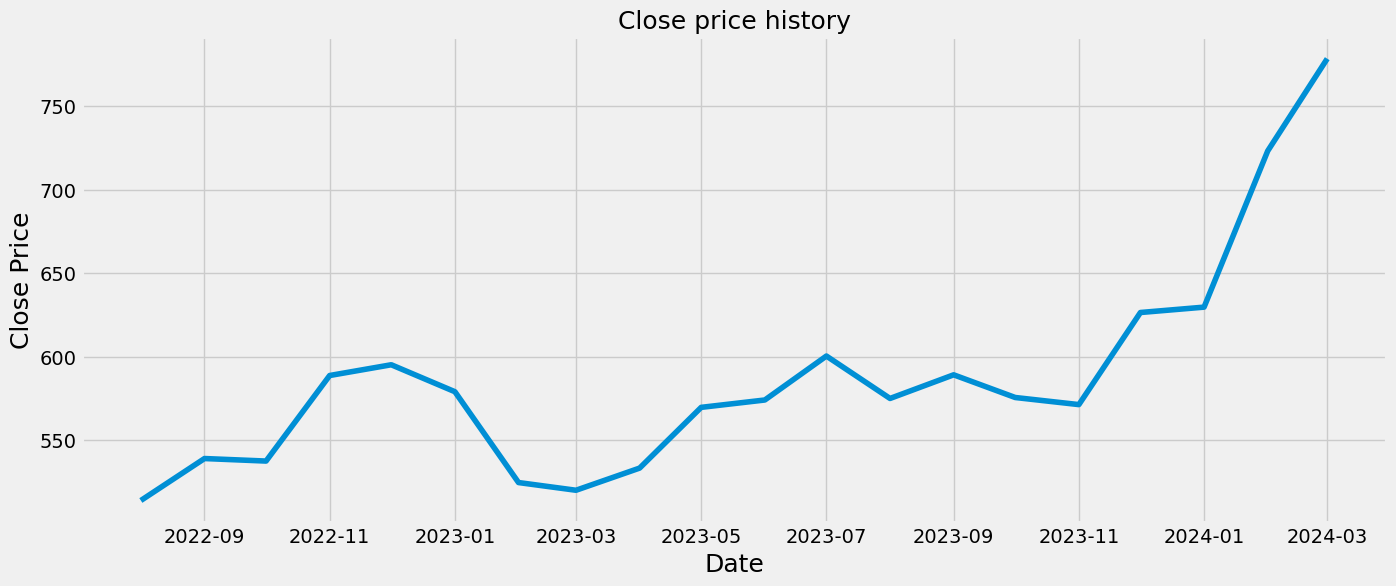

In [32]:
plt.figure(figsize=(15,6))
# # Formatting x-axis ticks to display only month and year
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.title("Close price history", fontsize=18)
plt.plot(df_sample["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()

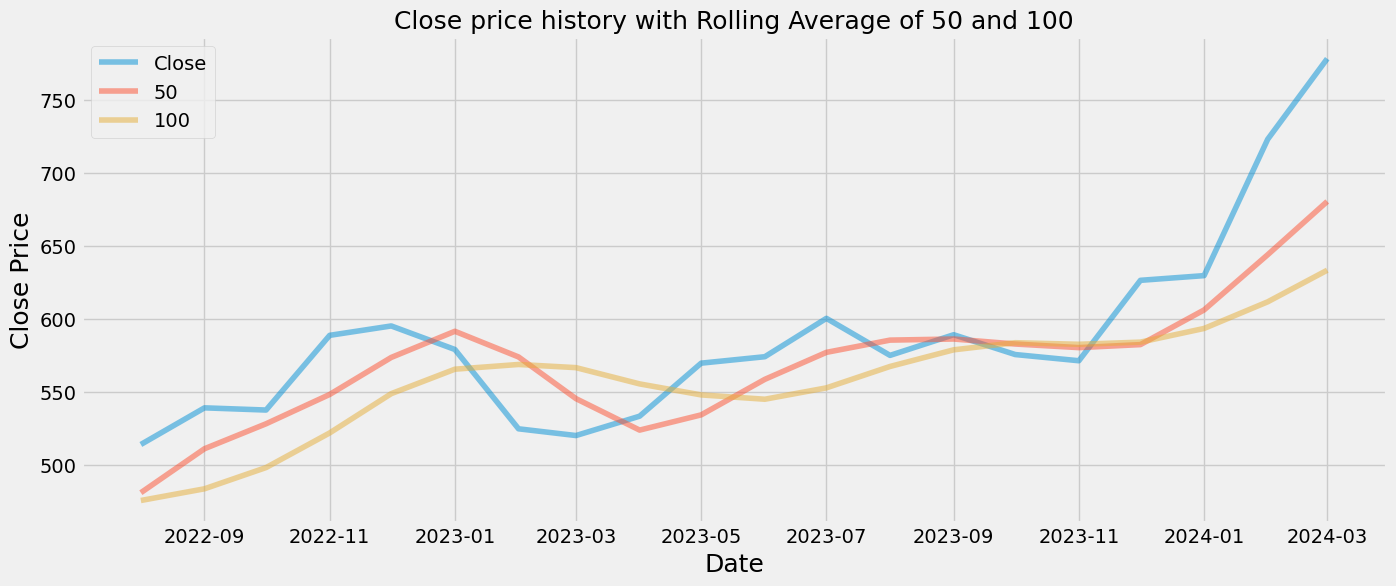

In [33]:
plt.figure(figsize=(15,6))
plt.title("Close price history with Rolling Average of 50 and 100", fontsize=18)
plt.plot(df_sample["Close"], alpha = 0.5, label = "Close")
plt.plot(df_sample["Roll 50"], alpha = 0.5, label = "50")
plt.plot(df_sample["Roll 100"], alpha = 0.5, label = "100")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.legend()
plt.show()

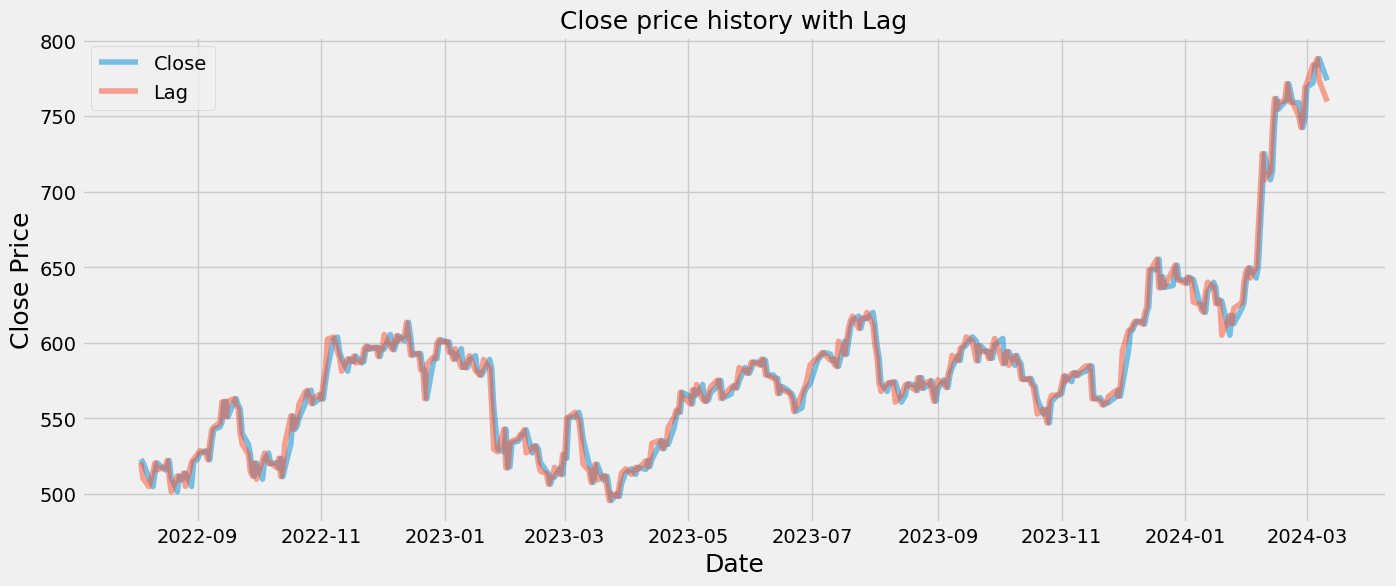

In [34]:
plt.figure(figsize=(15,6))
plt.title("Close price history with Lag", fontsize=18)
plt.plot(df["Close"], alpha = 0.5, label = "Close")
plt.plot(df["Lag"], alpha = 0.5, label = "Lag")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.legend()
plt.show()

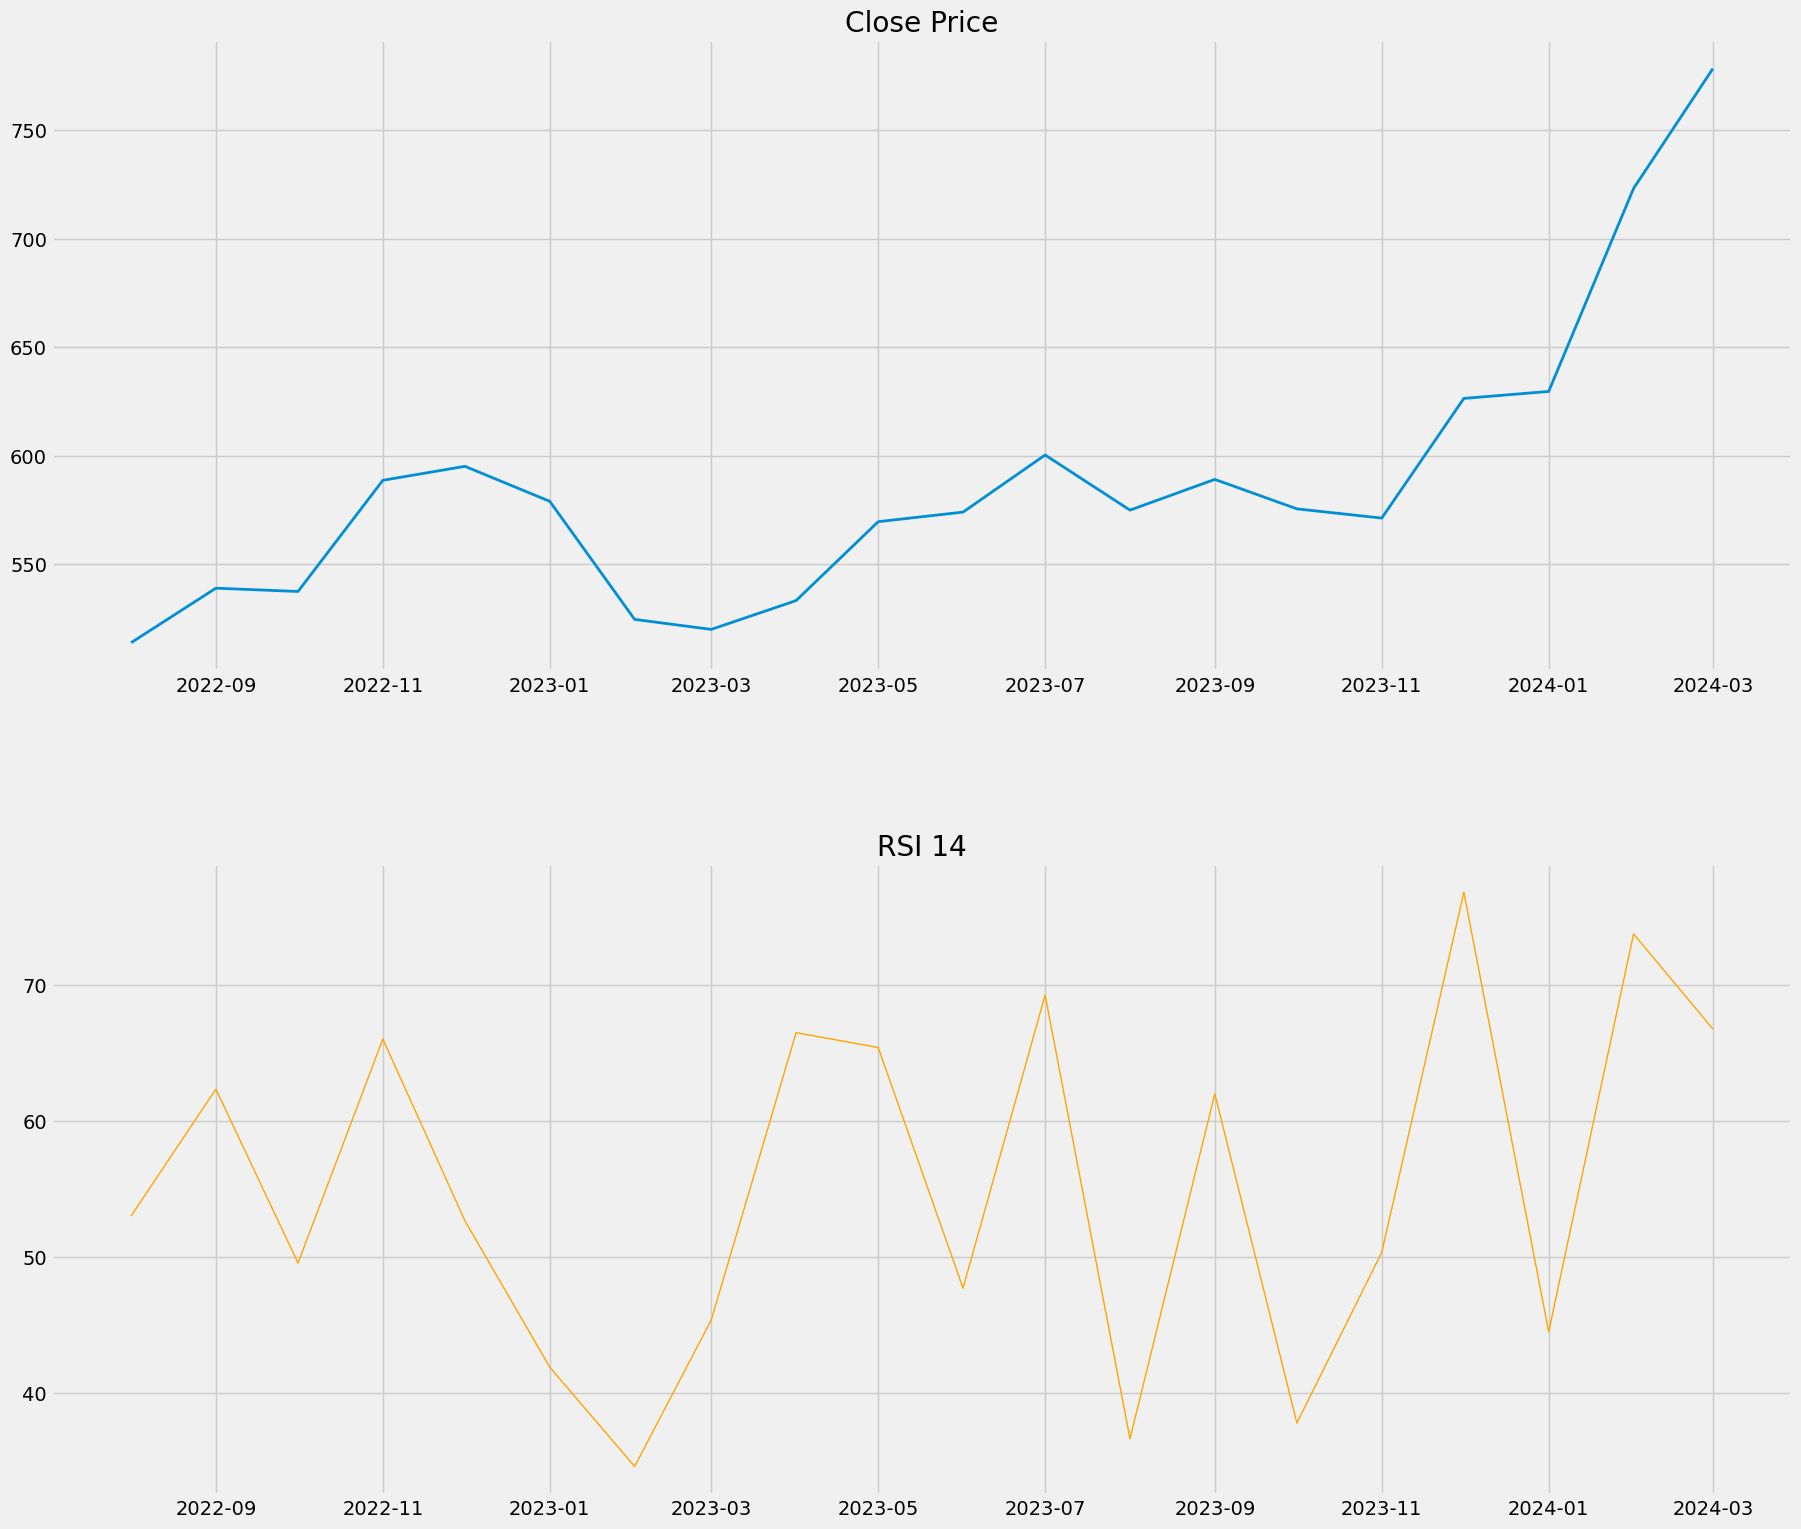

In [35]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart Plot the closing price on the first chart
ax1.plot(df_sample["Close"], linewidth=2)
ax1.set_title("Close Price")

# Second chart Plot the RSI
ax2.set_title("RSI 14")
ax2.plot(df_sample["RSI 14"], color="orange", linewidth=1)

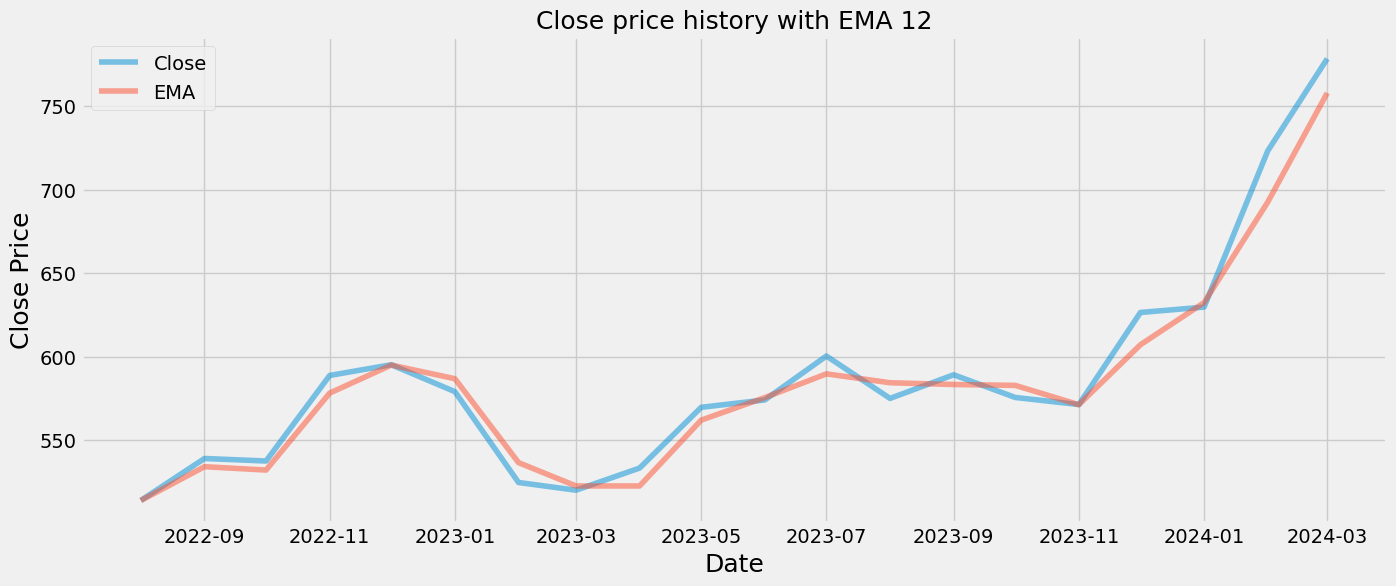

In [36]:
plt.figure(figsize=(15,6))
plt.title("Close price history with EMA 12", fontsize=18)
plt.plot(df_sample["Close"], alpha = 0.5, label = "Close")
plt.plot(df_sample["EMA 12"], alpha = 0.5, label = "EMA")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.legend()
plt.show()

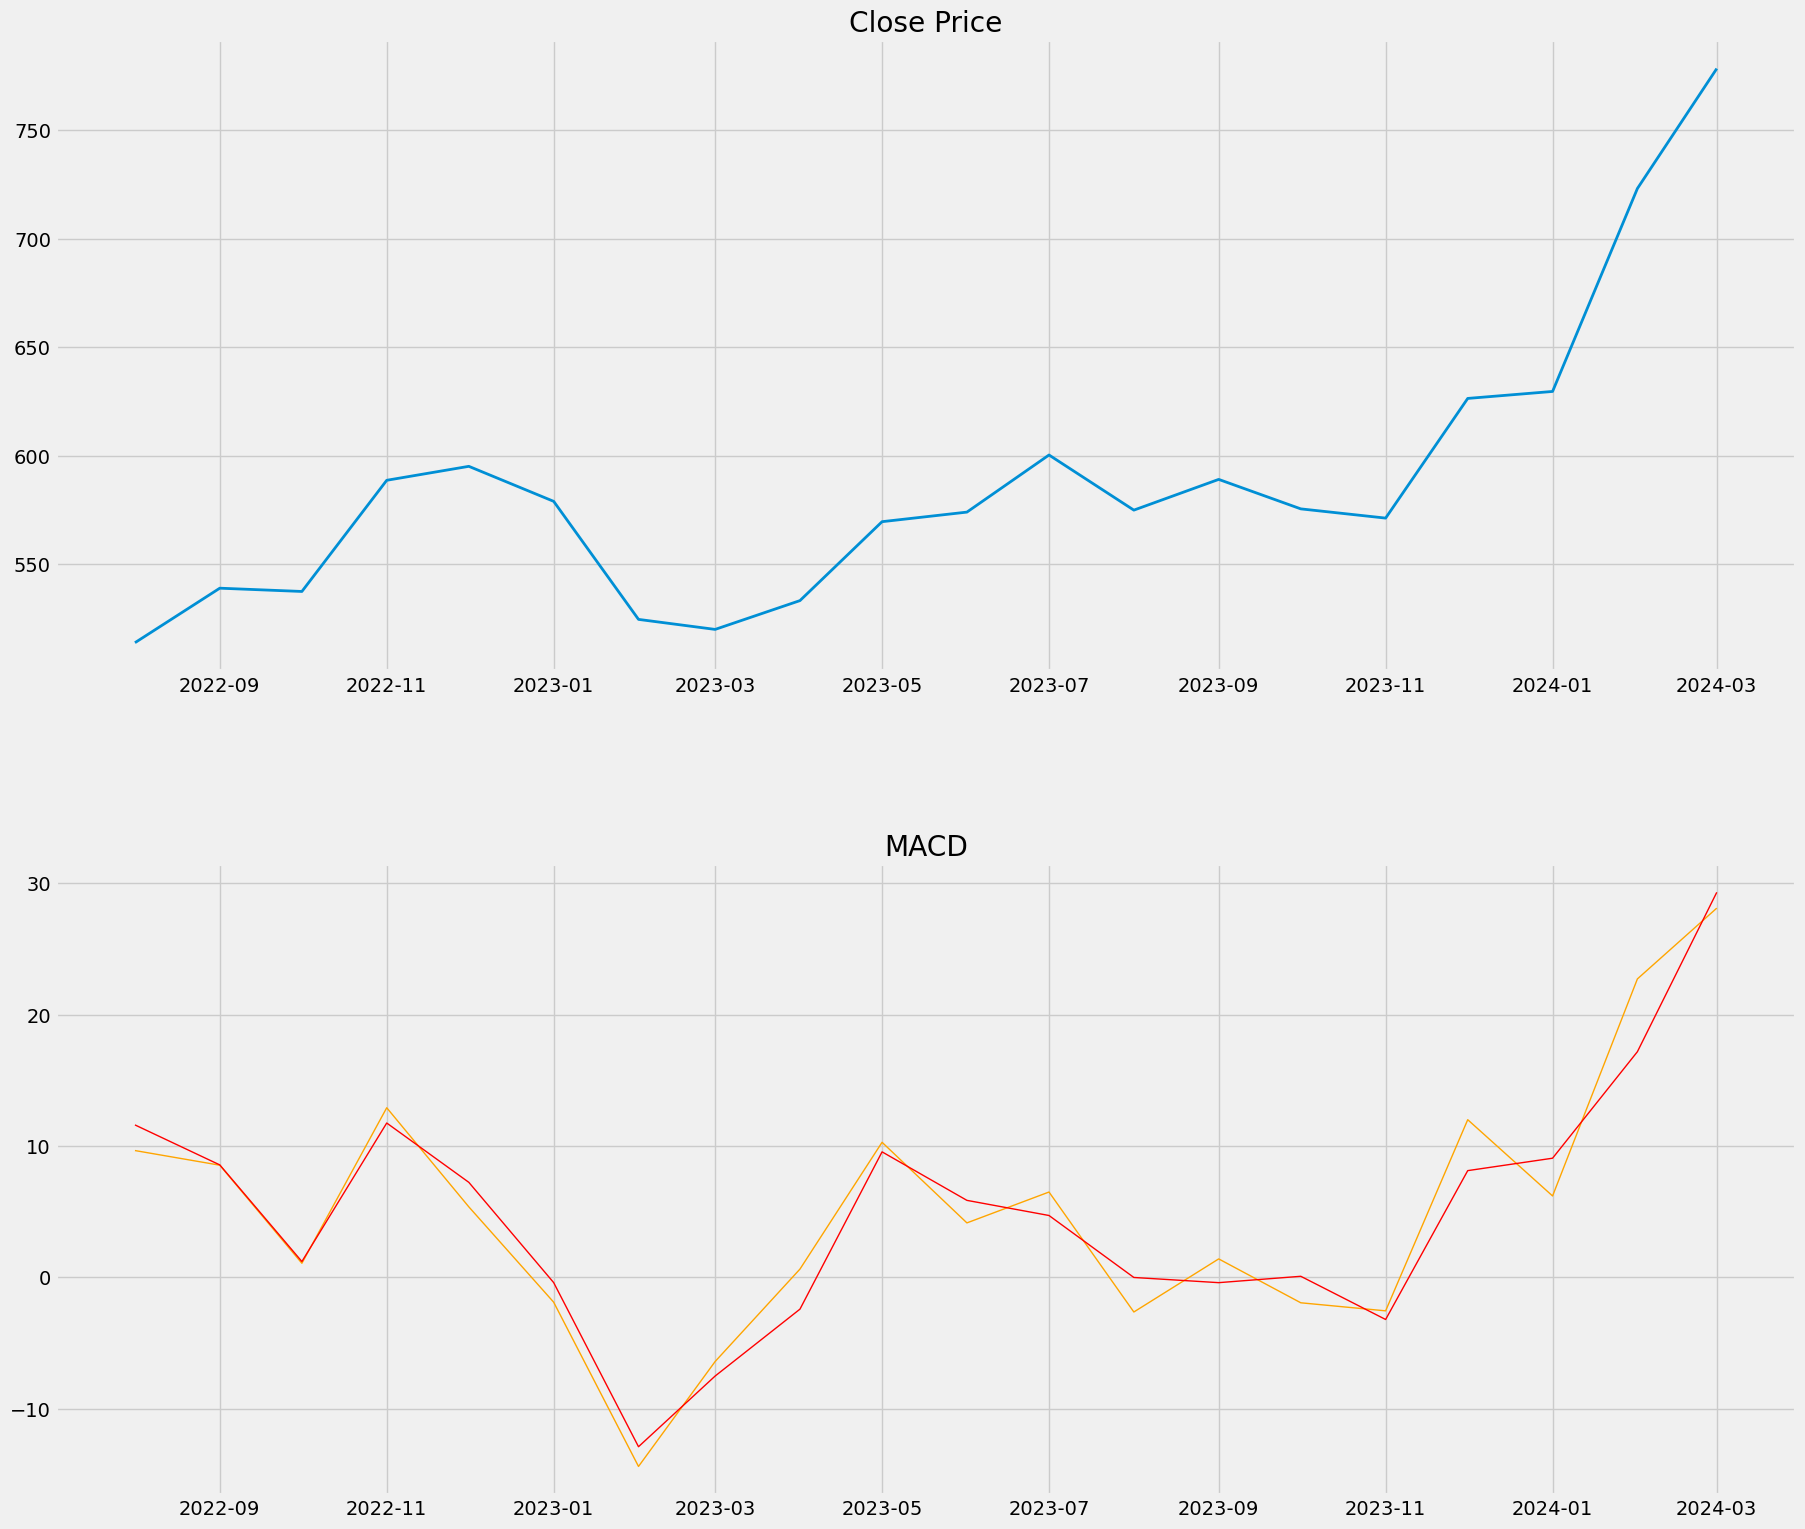

In [37]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df_sample["Close"], linewidth=2)
ax1.set_title("Close Price")

# Second chart
# Plot the RSI
ax2.set_title("MACD")
ax2.plot(df_sample["MACD(26-12)"], color="orange", linewidth=1)
ax2.plot(df_sample["Signal Line"], color="red", linewidth=1)

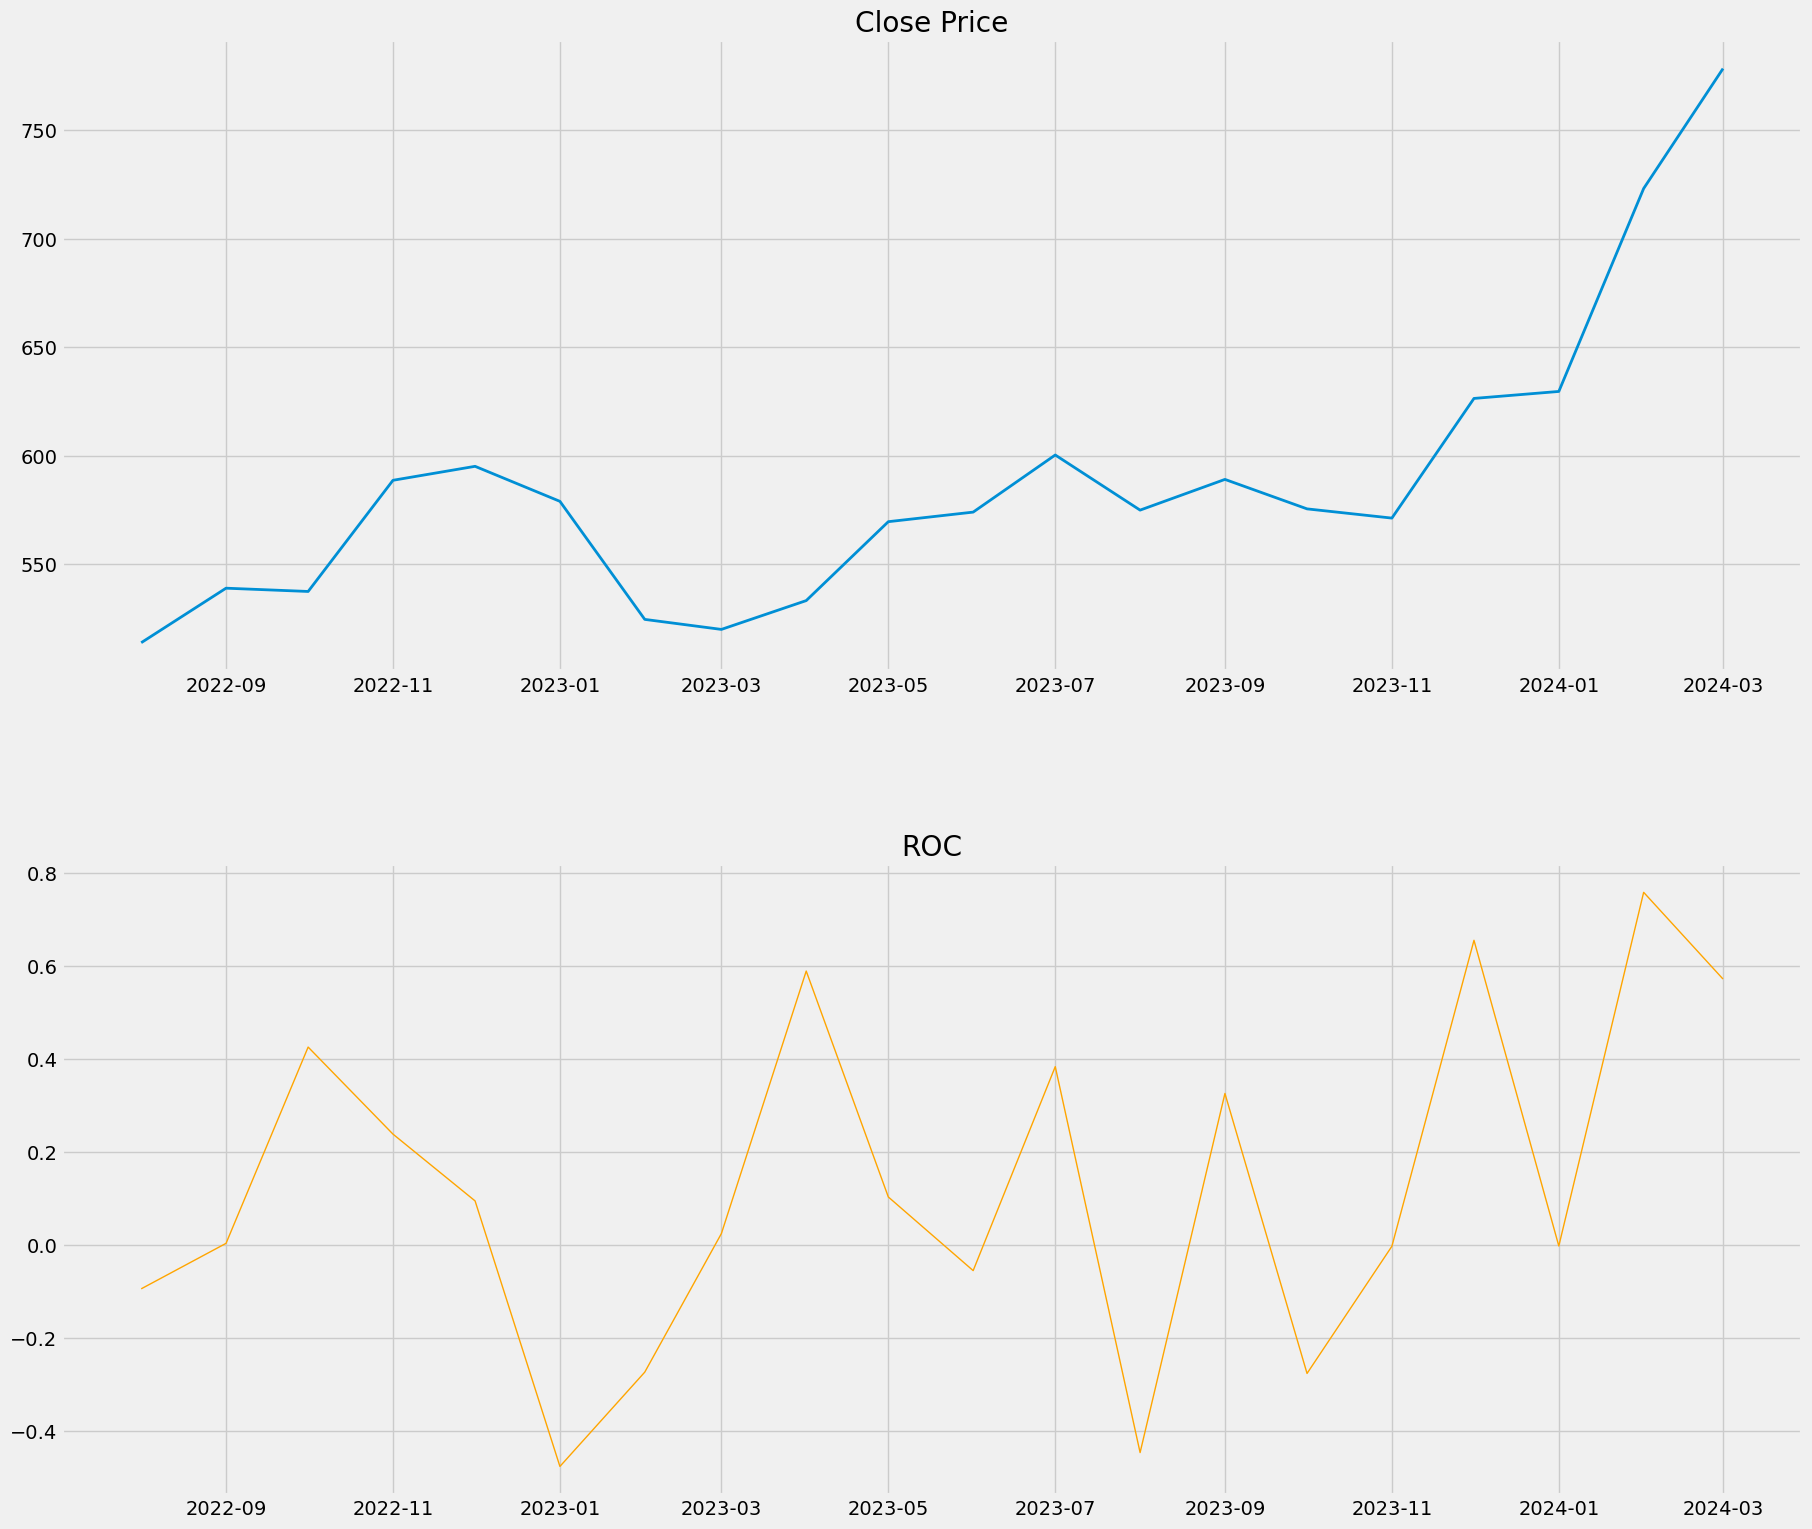

In [38]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(df_sample["Close"], linewidth=2)
ax1.set_title("Close Price")

# Second chart
# Plot the RSI
ax2.set_title("ROC")
ax2.plot(df_sample["ROC"], color="orange", linewidth=1)

## **6) Feature Importance**

In [39]:
df_features = df.iloc[:, df.columns != "Close"]

df_target = df.iloc[:, df.columns == "Close"]

In [40]:
corr=df.corr(numeric_only=True)
corr

,Open,High,Low,Close,Volume,Roll 50,Roll 100,Lag,RSI 14,EMA 12,MACD(26-12),Signal Line,ROC
Open,1.000000,0.995507,0.994515,0.990209,0.120135,0.813947,0.630850,0.977436,0.403716,0.977963,0.710454,0.666408,0.025427
High,0.995507,1.000000,0.993264,0.995955,0.158333,0.809912,0.625586,0.984902,0.417948,0.974999,0.713148,0.664091,0.088003
Low,0.994515,0.993264,1.000000,0.995669,0.090388,0.802361,0.624020,0.983659,0.424353,0.972337,0.717972,0.668514,0.095762
Close,0.990209,0.995955,0.995669,1.000000,0.129370,0.803944,0.624560,0.989066,0.433661,0.970232,0.713754,0.660587,0.151648
Volume,0.120135,0.158333,0.090388,0.129370,1.000000,0.142022,0.213345,0.149180,0.072845,0.107242,0.019963,-0.025056,0.083155
Roll 50,0.813947,0.809912,0.802361,0.803944,0.142022,1.000000,0.880676,0.795039,-0.011913,0.872545,0.193175,0.185797,0.011776
Roll 100,0.630850,0.625586,0.624020,0.624560,0.213345,0.880676,1.000000,0.619331,-0.022483,0.680555,0.021422,-0.030422,0.018723
Lag,0.977436,0.984902,0.983659,0.989066,0.149180,0.795039,0.619331,1.000000,0.427522,0.957405,0.702479,0.647230,0.159668
RSI 14,0.403716,0.417948,0.424353,0.433661,0.072845,-0.011913,-0.022483,0.427522,1.000000,0.263280,0.697147,0.494959,0.244095
EMA 12,0.977963,0.974999,0.972337,0.970232,0.107242,0.872545,0.680555,0.957405,0.263280,1.000000,0.629231,0.635692,0.020239


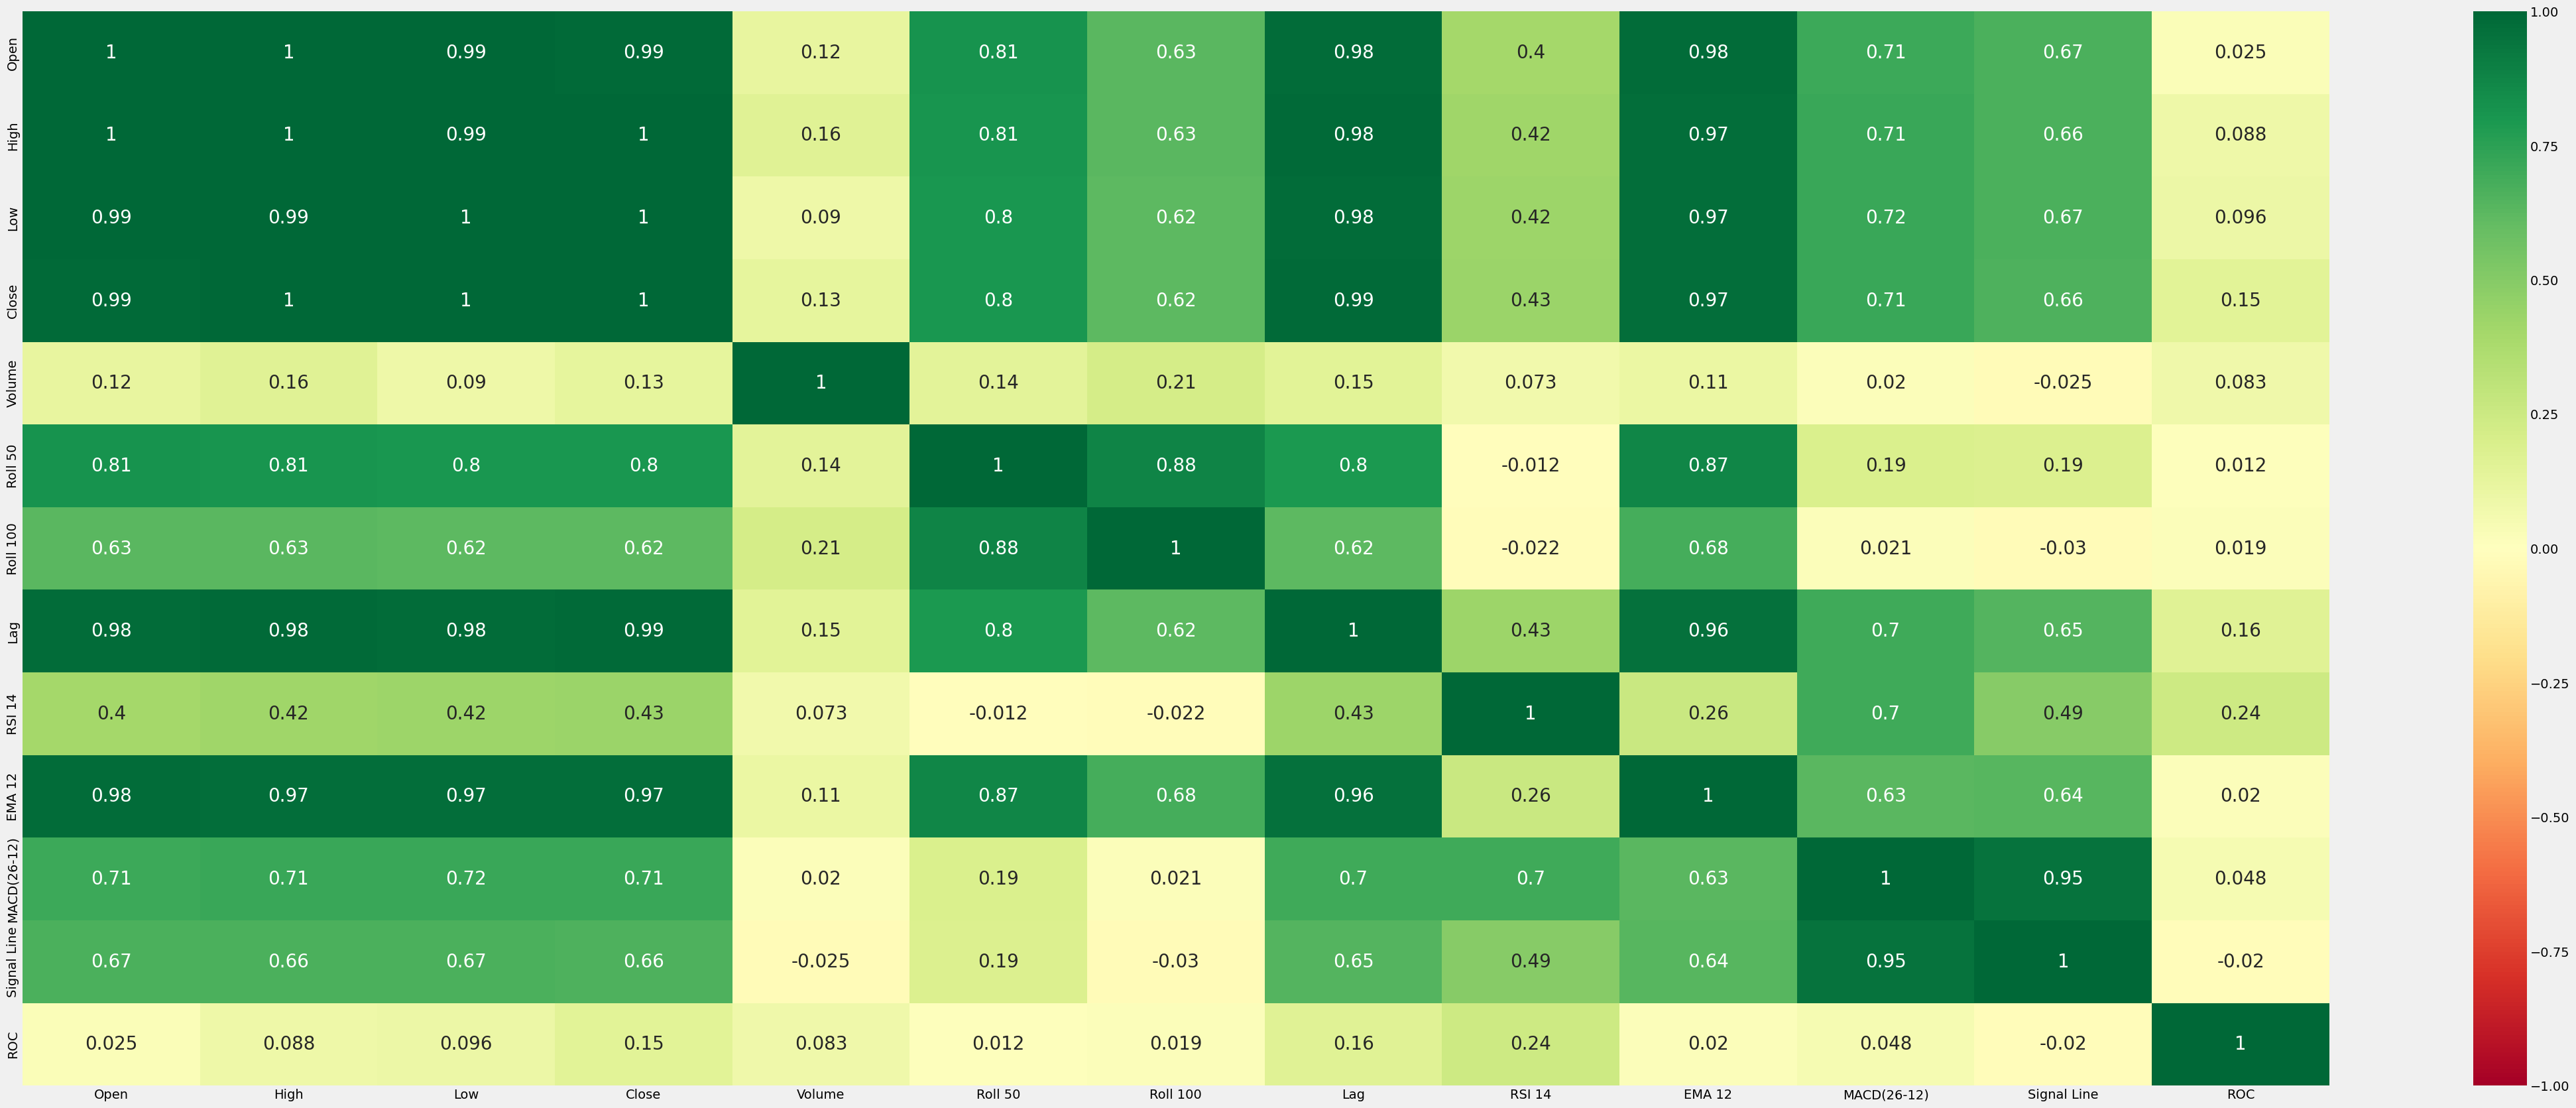

In [41]:
plt.figure(figsize=(50, 20))
sns.heatmap(corr, cmap = "RdYlGn", vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20})
plt.show()

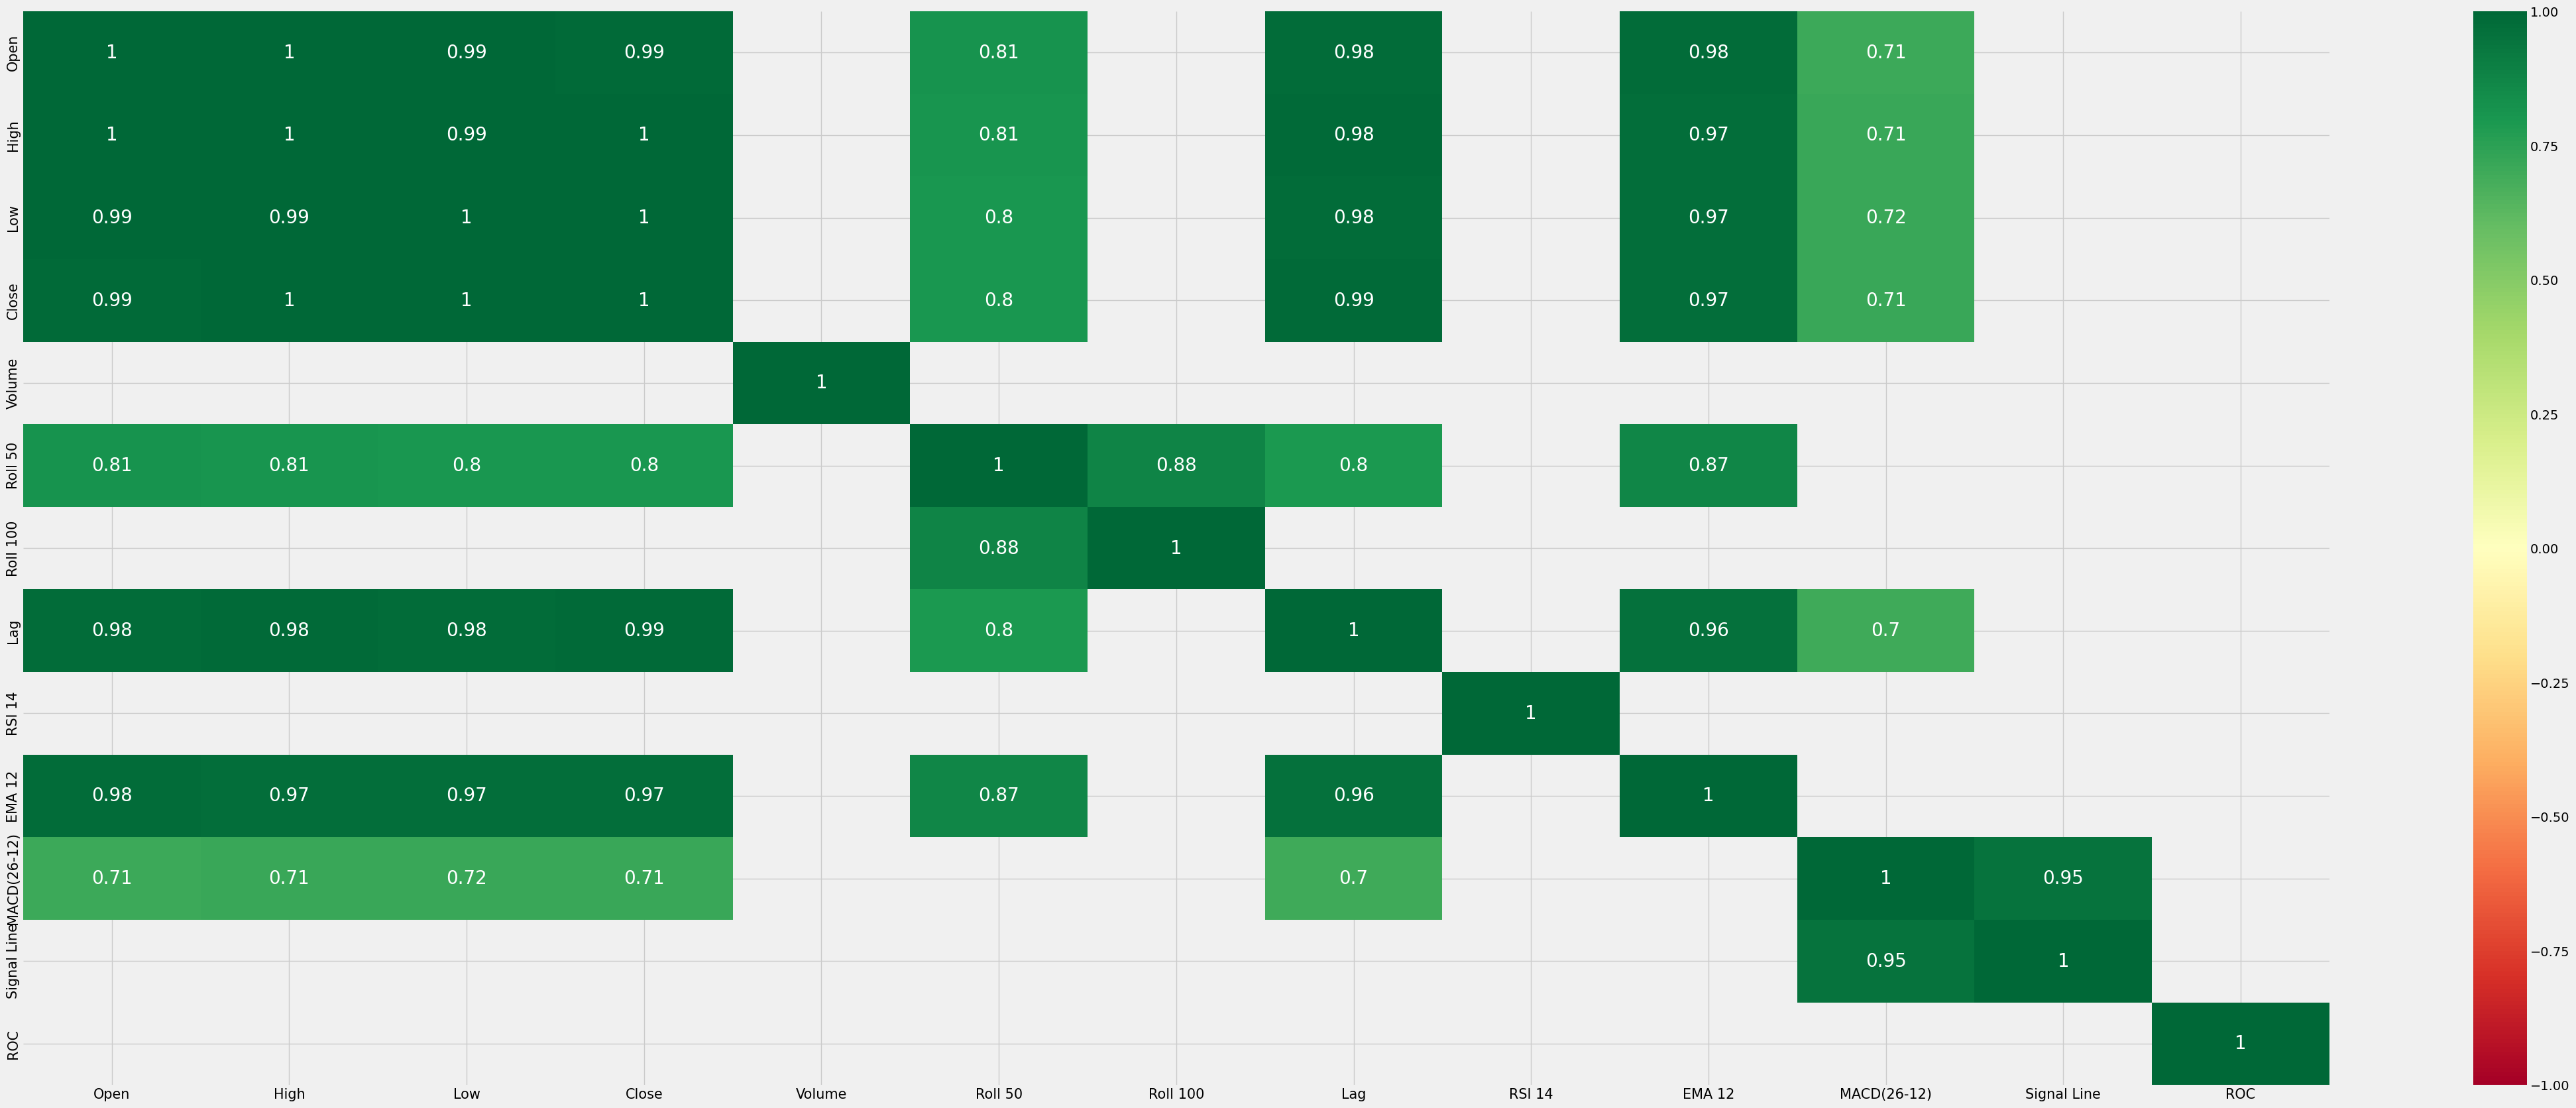

In [42]:
plt.figure(figsize=(50, 20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = "RdYlGn", vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

In [43]:
correlation_matrix = df.corr()
close_correlations = correlation_matrix["Close"].sort_values(ascending=False)

print("Correlation Coefficients:")
print(close_correlations)

Correlation Coefficients:
Close          1.000000
High           0.995955
Low            0.995669
Open           0.990209
Lag            0.989066
EMA 12         0.970232
Roll 50        0.803944
MACD(26-12)    0.713754
Signal Line    0.660587
Roll 100       0.624560
RSI 14         0.433661
ROC            0.151648
Volume         0.129370
Name: Close, dtype: float64


In [44]:
df1 = df.copy()
df=sm.add_constant(df1)

In [45]:
split_index = int(0.8 * len(df1))
train_data = df1.iloc[:split_index]
test_data = df1.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

In [46]:
train_data.shape

(315, 13)

In [47]:
test_data.shape

(79, 13)

In [48]:
scaler = StandardScaler()
scaler.fit(df1)
df_scaled=scaler.transform(df1)
df_scaled

array([[-0.88497583, -0.95415919, -1.12664931, ...,  1.32052532,
         1.25867223, -1.06968411],
       [-1.02984457, -0.97341838, -1.04047416, ...,  1.24497786,
         1.28491541, -0.36696007],
       [-1.23641551, -1.30433252, -1.31246609, ...,  1.08135586,
         1.26979752, -1.49464466],
       ...,
       [ 3.67976579,  3.62711164,  3.60796437, ...,  2.48927806,
         2.8388605 , -0.0793969 ],
       [ 3.79554163,  3.68244386,  3.79281515, ...,  2.49657206,
         2.82530097,  0.29990562],
       [ 3.79554163,  3.67173387,  3.56495377, ...,  2.3517068 ,
         2.78248064, -1.36402216]])

In [49]:
y_train = train_data.pop("Close")
X_train = train_data

In [50]:
X_train.head()

,Open,High,Low,Volume,Roll 50,Roll 100,Lag,RSI 14,EMA 12,MACD(26-12),Signal Line,ROC
0,533.286922,533.630227,514.207668,18072293,471.594724,472.319269,520.927063,81.031517,514.300889,17.095140,15.196303,-1.405186
1,525.341284,532.551213,518.916152,21110734,472.813049,472.842648,510.480103,76.038328,515.320300,16.357417,15.428526,-0.412568
2,514.011455,514.011455,504.054911,32566317,473.711588,473.254796,504.888733,63.815390,514.575654,14.759644,15.294750,-2.005456
3,511.608133,513.520974,503.613526,16904151,474.625822,473.544386,514.747192,53.997366,513.085359,12.893591,14.814518,-1.095316
4,510.087737,515.973365,507.341123,13862195,475.733302,473.844184,520.583740,57.659846,513.341026,12.071078,14.265830,1.952600


In [51]:
y_train.head()

0    523.085144
1    520.927063
2    510.480103
3    504.888733
4    514.747192
Name: Close, dtype: float64

In [52]:
y_test = test_data.pop("Close")
X_test = test_data

In [53]:
df_lm = LinearRegression()
df_lm.fit(X_train,y_train)

LinearRegression()

In [54]:
df_lm = sm.OLS(y_train, X_train).fit()

In [55]:
print(df_lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.288e+06
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        21:07:07   Log-Likelihood:                         -587.31
No. Observations:                 315   AIC:                                      1199.
Df Residuals:                     303   BIC:                                      1244.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [56]:
split_index = int(0.8 * len(df))
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

y_train = train_data.pop("Close")
X_train = train_data

y_test = test_data.pop("Close")
X_test = test_data

In [57]:
DT = DecisionTreeRegressor(random_state = 10)
DTM = DT.fit(X_train,y_train)

In [58]:
feature_importances = DTM.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

top_feature = sorted_features[0][0]
print("Top Feature:", top_feature)

Feature: High, Importance: 0.8381243186874674
Feature: Low, Importance: 0.1512881917259811
Feature: ROC, Importance: 0.004572822334102374
Feature: Lag, Importance: 0.002641201108449923
Feature: EMA 12, Importance: 0.0008461541730004603
Feature: Roll 100, Importance: 0.000732219183943677
Feature: Volume, Importance: 0.0005794532867656817
Feature: RSI 14, Importance: 0.0005077047418734189
Feature: Signal Line, Importance: 0.0002564313416166633
Feature: Roll 50, Importance: 0.00023412031163090935
Feature: MACD(26-12), Importance: 0.0001697425668803512
Feature: Open, Importance: 4.764053828799464e-05
Feature: const, Importance: 0.0
Top Feature: High


## Random Forest

In [59]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [60]:
feature_importances = rf_reg.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

top_feature = sorted_features[0][0]
print("Top Feature:", top_feature)

Feature: High, Importance: 0.5824643198227509
Feature: Low, Importance: 0.3985840819420962
Feature: Lag, Importance: 0.011958826998162003
Feature: ROC, Importance: 0.003102357138937766
Feature: Open, Importance: 0.0009419499346031658
Feature: RSI 14, Importance: 0.0006598563414392349
Feature: Volume, Importance: 0.0005998098619011735
Feature: EMA 12, Importance: 0.000493156480720092
Feature: Roll 100, Importance: 0.00035049661361314906
Feature: MACD(26-12), Importance: 0.0003140583132180613
Feature: Signal Line, Importance: 0.00028632692262510473
Feature: Roll 50, Importance: 0.00024475962993317197
Feature: const, Importance: 0.0
Top Feature: High


In [61]:
results = {}
for column in df_features:
   
    f_val, p_val = f_oneway(df[column], df["Close"])
    results[column] = {"F-value": f_val, "p-value": p_val}

# Find the column with the highest F-value or lowest p-value
best_column = min(results, key=lambda x: results[x]["p-value"])

print("Results:")
for column, result in results.items():
    print(f"{column}: F-value={result['F-value']}, p-value={result['p-value']}")

print(f"\nThe best column is: {best_column}")

Results:
Open: F-value=0.013970587185469143, p-value=0.9059415765824035
High: F-value=2.072940765875587, p-value=0.1503303251898708
Low: F-value=2.027252777549579, p-value=0.15489650730655766
Volume: F-value=1542.306915648836, p-value=1.5757810952850584e-187
Roll 50: F-value=18.502899001023543, p-value=1.910128672003392e-05
Roll 100: F-value=57.41653314535581, p-value=9.92799727159696e-14
Lag: F-value=0.022737928965130397, p-value=0.8801792666383519
RSI 14: F-value=32198.070712753397, p-value=0.0
EMA 12: F-value=0.8981093562691449, p-value=0.34358043357916723
MACD(26-12): F-value=41216.50033917196, p-value=0.0
Signal Line: F-value=41459.335540496395, p-value=0.0
ROC: F-value=43069.31078333782, p-value=0.0

The best column is: RSI 14


In [62]:
# Also known as a dependent samples t-test, this test is used to compare the means of two related groups (e.g., before and after measurements) 
# to determine if there is a significant difference between them.
for column in df_features.columns:
    t_statistic, p_value = stats.ttest_rel(df_features[column], df["Close"])
    print(f"Column: {column}, p-value: {p_value}")

Column: Open, p-value: 0.23467244014110453
Column: High, p-value: 1.0370567817354854e-72
Column: Low, p-value: 1.2489097049682324e-67
Column: Volume, p-value: 4.028540933467741e-138
Column: Roll 50, p-value: 8.7806294015389e-17
Column: Roll 100, p-value: 6.023441395983962e-27
Column: Lag, p-value: 0.1512879584379056
Column: RSI 14, p-value: 0.0
Column: EMA 12, p-value: 1.3429319140099317e-06
Column: MACD(26-12), p-value: 0.0
Column: Signal Line, p-value: 0.0
Column: ROC, p-value: 0.0


## Feature Selection using Random Forest

#### Random Forest for Linear Regression

In [63]:
df_ols = df.copy()

In [64]:
df_ols.head()

,const,Open,High,Low,Close,Volume,Roll 50,Roll 100,Lag,RSI 14,EMA 12,MACD(26-12),Signal Line,ROC
Date,,,,,,,,,,,,,,
2022-08-04,1.0,533.286922,533.630227,514.207668,523.085144,18072293,471.594724,472.319269,520.927063,81.031517,514.300889,17.095140,15.196303,-1.405186
2022-08-05,1.0,525.341284,532.551213,518.916152,520.927063,21110734,472.813049,472.842648,510.480103,76.038328,515.320300,16.357417,15.428526,-0.412568
2022-08-08,1.0,514.011455,514.011455,504.054911,510.480103,32566317,473.711588,473.254796,504.888733,63.815390,514.575654,14.759644,15.294750,-2.005456
2022-08-10,1.0,511.608133,513.520974,503.613526,504.888733,16904151,474.625822,473.544386,514.747192,53.997366,513.085359,12.893591,14.814518,-1.095316
2022-08-11,1.0,510.087737,515.973365,507.341123,514.747192,13862195,475.733302,473.844184,520.583740,57.659846,513.341026,12.071078,14.265830,1.952600


In [65]:
df_ols = df_ols.drop(["Open","Roll 100","Lag","RSI 14"], axis = 1)

In [66]:
df_ols.head()

,const,High,Low,Close,Volume,Roll 50,EMA 12,MACD(26-12),Signal Line,ROC
Date,,,,,,,,,,
2022-08-04,1.0,533.630227,514.207668,523.085144,18072293,471.594724,514.300889,17.095140,15.196303,-1.405186
2022-08-05,1.0,532.551213,518.916152,520.927063,21110734,472.813049,515.320300,16.357417,15.428526,-0.412568
2022-08-08,1.0,514.011455,504.054911,510.480103,32566317,473.711588,514.575654,14.759644,15.294750,-2.005456
2022-08-10,1.0,513.520974,503.613526,504.888733,16904151,474.625822,513.085359,12.893591,14.814518,-1.095316
2022-08-11,1.0,515.973365,507.341123,514.747192,13862195,475.733302,513.341026,12.071078,14.265830,1.952600


In [67]:
split_index = int(0.8 * len(df_ols))
train_data = df_ols.iloc[:split_index]
test_data = df_ols.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

In [68]:
y_train = train_data.pop("Close")
X_train = train_data
y_test = test_data.pop("Close")
X_test = test_data

In [69]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [70]:
# predict the values on test dataset using predict()
y_pred = rf_reg.predict(X_test)

In [71]:
# The mean absolute error represents the average of the absolute difference between the actual and the
# predicted values in the dataset
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", rf_reg_MAE)

# Mean Squared Error represents the difference between the original and predicted values which are 
# extracted by squaring the average difference over the dataset
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", rf_reg_MSE)

# RMSE represents the square root of mean squared error
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rf_reg_RMSE)

Mean Absolute Error (MAE): 48.465241776478436
Mean Squared Error (MSE): 5682.510691256812
Root Mean Squared Error (RMSE): 75.38242959242433


In [72]:
# create the result table for all accuracy scores accuracy measures considered for model comparision are RMSE
cols = ["Model", "MAE", "MSE", "RMSE"]

# create a empty dataframe of the columns
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({"Model": "Random Forest(OLS) ",
                     "MAE":rf_reg_MAE,
                     "MSE": rf_reg_MSE,
                     "RMSE": rf_reg_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation._append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest(OLS),48.465242,5682.510691,75.38243


#### Random Forest for Decision Tree

In [73]:
df_dt = df.copy()

In [74]:
df_dt = df_dt.drop(["Roll 50","Volume","Signal Line","EMA 12"], axis = 1)
df_dt.head()

,const,Open,High,Low,Close,Roll 100,Lag,RSI 14,MACD(26-12),ROC
Date,,,,,,,,,,
2022-08-04,1.0,533.286922,533.630227,514.207668,523.085144,472.319269,520.927063,81.031517,17.095140,-1.405186
2022-08-05,1.0,525.341284,532.551213,518.916152,520.927063,472.842648,510.480103,76.038328,16.357417,-0.412568
2022-08-08,1.0,514.011455,514.011455,504.054911,510.480103,473.254796,504.888733,63.815390,14.759644,-2.005456
2022-08-10,1.0,511.608133,513.520974,503.613526,504.888733,473.544386,514.747192,53.997366,12.893591,-1.095316
2022-08-11,1.0,510.087737,515.973365,507.341123,514.747192,473.844184,520.583740,57.659846,12.071078,1.952600


In [75]:
split_index = int(0.8 * len(df_dt))
train_data = df_dt.iloc[:split_index]
test_data = df_dt.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

y_train = train_data.pop("Close")
X_train = train_data
y_test = test_data.pop("Close")
X_test = test_data

In [76]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [77]:
y_pred = rf_reg.predict(X_test)

In [78]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [79]:
# compile the required information
rf_reg_metrics = pd.Series({"Model": "Random Forest(DT) ",
                     "MAE":rf_reg_MAE,
                     "MSE": rf_reg_MSE,
                     "RMSE": rf_reg_RMSE     
                   })

result_tabulation = result_tabulation._append(rf_reg_metrics, ignore_index = True)

result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest(OLS),48.465242,5682.510691,75.382430
1,Random Forest(DT),49.056404,5710.103208,75.565225


#### Random Forest for Random Forest

In [80]:
df_rt = df.copy()

In [81]:
df_rt = df_rt.drop(["Volume","MACD(26-12)","EMA 12","Roll 50"], axis = 1)
df_rt.head()

,const,Open,High,Low,Close,Roll 100,Lag,RSI 14,Signal Line,ROC
Date,,,,,,,,,,
2022-08-04,1.0,533.286922,533.630227,514.207668,523.085144,472.319269,520.927063,81.031517,15.196303,-1.405186
2022-08-05,1.0,525.341284,532.551213,518.916152,520.927063,472.842648,510.480103,76.038328,15.428526,-0.412568
2022-08-08,1.0,514.011455,514.011455,504.054911,510.480103,473.254796,504.888733,63.815390,15.294750,-2.005456
2022-08-10,1.0,511.608133,513.520974,503.613526,504.888733,473.544386,514.747192,53.997366,14.814518,-1.095316
2022-08-11,1.0,510.087737,515.973365,507.341123,514.747192,473.844184,520.583740,57.659846,14.265830,1.952600


In [82]:
split_index = int(0.8 * len(df_rt))
train_data = df_rt.iloc[:split_index]
test_data = df_rt.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

y_train = train_data.pop("Close")
X_train = train_data
y_test = test_data.pop("Close")
X_test = test_data

In [83]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [84]:
y_pred = rf_reg.predict(X_test)

In [85]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [86]:
# compile the required information
rf_reg_metrics = pd.Series({"Model": "Random Forest(RT) ",
                     "MAE": rf_reg_MAE,
                     "MSE": rf_reg_MSE,
                     "RMSE": rf_reg_RMSE     
                   })

result_tabulation = result_tabulation._append(rf_reg_metrics, ignore_index = True)

result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest(OLS),48.465242,5682.510691,75.382430
1,Random Forest(DT),49.056404,5710.103208,75.565225
2,Random Forest(RT),48.824048,5692.396203,75.447970


#### Random Forest for Corr

In [87]:
df_corr = df.copy()

In [88]:
df_corr = df_corr.drop(["ROC","Roll 50","Volume","Roll 100"], axis=1)
df_corr.head()

,const,Open,High,Low,Close,Lag,RSI 14,EMA 12,MACD(26-12),Signal Line
Date,,,,,,,,,,
2022-08-04,1.0,533.286922,533.630227,514.207668,523.085144,520.927063,81.031517,514.300889,17.095140,15.196303
2022-08-05,1.0,525.341284,532.551213,518.916152,520.927063,510.480103,76.038328,515.320300,16.357417,15.428526
2022-08-08,1.0,514.011455,514.011455,504.054911,510.480103,504.888733,63.815390,514.575654,14.759644,15.294750
2022-08-10,1.0,511.608133,513.520974,503.613526,504.888733,514.747192,53.997366,513.085359,12.893591,14.814518
2022-08-11,1.0,510.087737,515.973365,507.341123,514.747192,520.583740,57.659846,513.341026,12.071078,14.265830


In [89]:
split_index = int(0.8*len(df_corr))
train_data = df_corr.iloc[:split_index]
test_data = df_corr.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

y_train = train_data.pop("Close")
X_train = train_data
y_test = test_data.pop("Close")
X_test = test_data

In [90]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [91]:
y_pred = rf_reg.predict(X_test)

In [92]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [93]:
# compile the required information
rf_reg_metrics = pd.Series({"Model": "Random Forest(Corr) ",
                     "MAE":rf_reg_MAE,
                     "MSE": rf_reg_MSE,
                     "RMSE": rf_reg_RMSE     
                   })

result_tabulation = result_tabulation._append(rf_reg_metrics, ignore_index = True)

result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest(OLS),48.465242,5682.510691,75.382430
1,Random Forest(DT),49.056404,5710.103208,75.565225
2,Random Forest(RT),48.824048,5692.396203,75.447970
3,Random Forest(Corr),49.079637,5696.354630,75.474198


#### Random Forest for ANOVA

In [94]:
df_an = df.copy()

In [95]:
df_an = df_an.drop(["Open","EMA 12","Lag","Roll 50"], axis = 1)
df_an.head()

,const,High,Low,Close,Volume,Roll 100,RSI 14,MACD(26-12),Signal Line,ROC
Date,,,,,,,,,,
2022-08-04,1.0,533.630227,514.207668,523.085144,18072293,472.319269,81.031517,17.095140,15.196303,-1.405186
2022-08-05,1.0,532.551213,518.916152,520.927063,21110734,472.842648,76.038328,16.357417,15.428526,-0.412568
2022-08-08,1.0,514.011455,504.054911,510.480103,32566317,473.254796,63.815390,14.759644,15.294750,-2.005456
2022-08-10,1.0,513.520974,503.613526,504.888733,16904151,473.544386,53.997366,12.893591,14.814518,-1.095316
2022-08-11,1.0,515.973365,507.341123,514.747192,13862195,473.844184,57.659846,12.071078,14.265830,1.952600


In [96]:
split_index = int(0.8*len(df_an))
train_data = df_an.iloc[:split_index]
test_data = df_an.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

y_train = train_data.pop("Close")
X_train = train_data
y_test = test_data.pop("Close")
X_test = test_data

In [97]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [98]:
y_pred = rf_reg.predict(X_test)

In [99]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [100]:
# compile the required information
rf_reg_metrics = pd.Series({"Model": "Random Forest(ANOVA) ",
                     "MAE":rf_reg_MAE,
                     "MSE": rf_reg_MSE,
                     "RMSE": rf_reg_RMSE     
                   })

result_tabulation = result_tabulation._append(rf_reg_metrics, ignore_index = True)

result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest(OLS),48.465242,5682.510691,75.382430
1,Random Forest(DT),49.056404,5710.103208,75.565225
2,Random Forest(RT),48.824048,5692.396203,75.447970
3,Random Forest(Corr),49.079637,5696.354630,75.474198
4,Random Forest(ANOVA),48.867262,5690.521393,75.435545


#### Random Forest for T-Test

In [101]:
df_tt = df.copy()

In [102]:
df_tt = df_tt.drop(["Open","Roll 50","Lag","EMA 12"], axis = 1)
df_tt.head()

,const,High,Low,Close,Volume,Roll 100,RSI 14,MACD(26-12),Signal Line,ROC
Date,,,,,,,,,,
2022-08-04,1.0,533.630227,514.207668,523.085144,18072293,472.319269,81.031517,17.095140,15.196303,-1.405186
2022-08-05,1.0,532.551213,518.916152,520.927063,21110734,472.842648,76.038328,16.357417,15.428526,-0.412568
2022-08-08,1.0,514.011455,504.054911,510.480103,32566317,473.254796,63.815390,14.759644,15.294750,-2.005456
2022-08-10,1.0,513.520974,503.613526,504.888733,16904151,473.544386,53.997366,12.893591,14.814518,-1.095316
2022-08-11,1.0,515.973365,507.341123,514.747192,13862195,473.844184,57.659846,12.071078,14.265830,1.952600


In [103]:
split_index = int(0.8*len(df_tt))
train_data = df_tt.iloc[:split_index]
test_data = df_tt.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

y_train = train_data.pop("Close")
X_train = train_data
y_test = test_data.pop("Close")
X_test = test_data

In [104]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [105]:
y_pred = rf_reg.predict(X_test)

In [106]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)

rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)

rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [107]:
# compile the required information
rf_reg_metrics = pd.Series({"Model": "Random Forest(T-Test) ",
                     "MAE":rf_reg_MAE,
                     "MSE": rf_reg_MSE,
                     "RMSE": rf_reg_RMSE     
                   })

result_tabulation = result_tabulation._append(rf_reg_metrics, ignore_index = True)

result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest(OLS),48.465242,5682.510691,75.382430
1,Random Forest(DT),49.056404,5710.103208,75.565225
2,Random Forest(RT),48.824048,5692.396203,75.447970
3,Random Forest(Corr),49.079637,5696.354630,75.474198
4,Random Forest(ANOVA),48.867262,5690.521393,75.435545
5,Random Forest(T-Test),48.867262,5690.521393,75.435545


As we can see from above random forest feature are important for target variable. So we are using those features that are of important according to the Random forest for further evaluation.

## **7) Data Splitting and Model Building**

In [108]:
df_model = df.copy()

In [109]:
df_model = df_model.drop(["MACD(26-12)","EMA 12","Volume","Roll 50"], axis = 1)

In [110]:
split_index = int(0.8 * len(df_model))
train_data = df_model.iloc[:split_index]
test_data = df_model.iloc[split_index:]

train_data.reset_index(drop = True, inplace = True)
test_data.reset_index(drop = True, inplace = True)

y_train = train_data.pop("Close")
X_train = train_data
y_test = test_data.pop("Close")
X_test = test_data

print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (315, 9)
X_test shape is (79, 9)
y_train shape is (315,)
y_test shape is (79,)


Linear Regression 

In [111]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [112]:
rfe = RFE(estimator=lm, n_features_to_select=5)             
rfe = rfe.fit(X_train, y_train)

In [113]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 5),
 ('Open', False, 3),
 ('High', True, 1),
 ('Low', True, 1),
 ('Roll 100', False, 2),
 ('Lag', True, 1),
 ('RSI 14', False, 4),
 ('Signal Line', True, 1),
 ('ROC', True, 1)]

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['High', 'Low', 'Lag', 'Signal Line', 'ROC'], dtype='object')

In [115]:
X_train.columns[~rfe.support_]

Index(['const', 'Open', 'Roll 100', 'RSI 14'], dtype='object')

In [116]:
X_train_rfe = X_train[col]

In [117]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [118]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.810e+04
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:07:10   Log-Likelihood:                -633.53
No. Observations:                 315   AIC:                             1279.
Df Residuals:                     309   BIC:                             1302.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4665      2.092      1.179      

In [119]:
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,413.76
2,Low,34.36
1,High,33.33
3,Lag,15.76
5,ROC,1.21
4,Signal Line,1.18


In [120]:
df_model["High_Low_Difference"] = df_model["High"] - df_model["Low"]
df_model.drop(["High", "Low"], axis=1, inplace=True)
df_model.head()

,const,Open,Close,Roll 100,Lag,RSI 14,Signal Line,ROC,High_Low_Difference
Date,,,,,,,,,
2022-08-04,1.0,533.286922,523.085144,472.319269,520.927063,81.031517,15.196303,-1.405186,19.422559
2022-08-05,1.0,525.341284,520.927063,472.842648,510.480103,76.038328,15.428526,-0.412568,13.635061
2022-08-08,1.0,514.011455,510.480103,473.254796,504.888733,63.815390,15.294750,-2.005456,9.956544
2022-08-10,1.0,511.608133,504.888733,473.544386,514.747192,53.997366,14.814518,-1.095316,9.907449
2022-08-11,1.0,510.087737,514.747192,473.844184,520.583740,57.659846,14.265830,1.952600,8.632242


In [121]:
y_train_price = lm.predict(X_train_rfe)

In [122]:
# Residual Analysis of the train data
# So, now to check if the error terms are also normally distributed (which is infact, one of the major
# assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

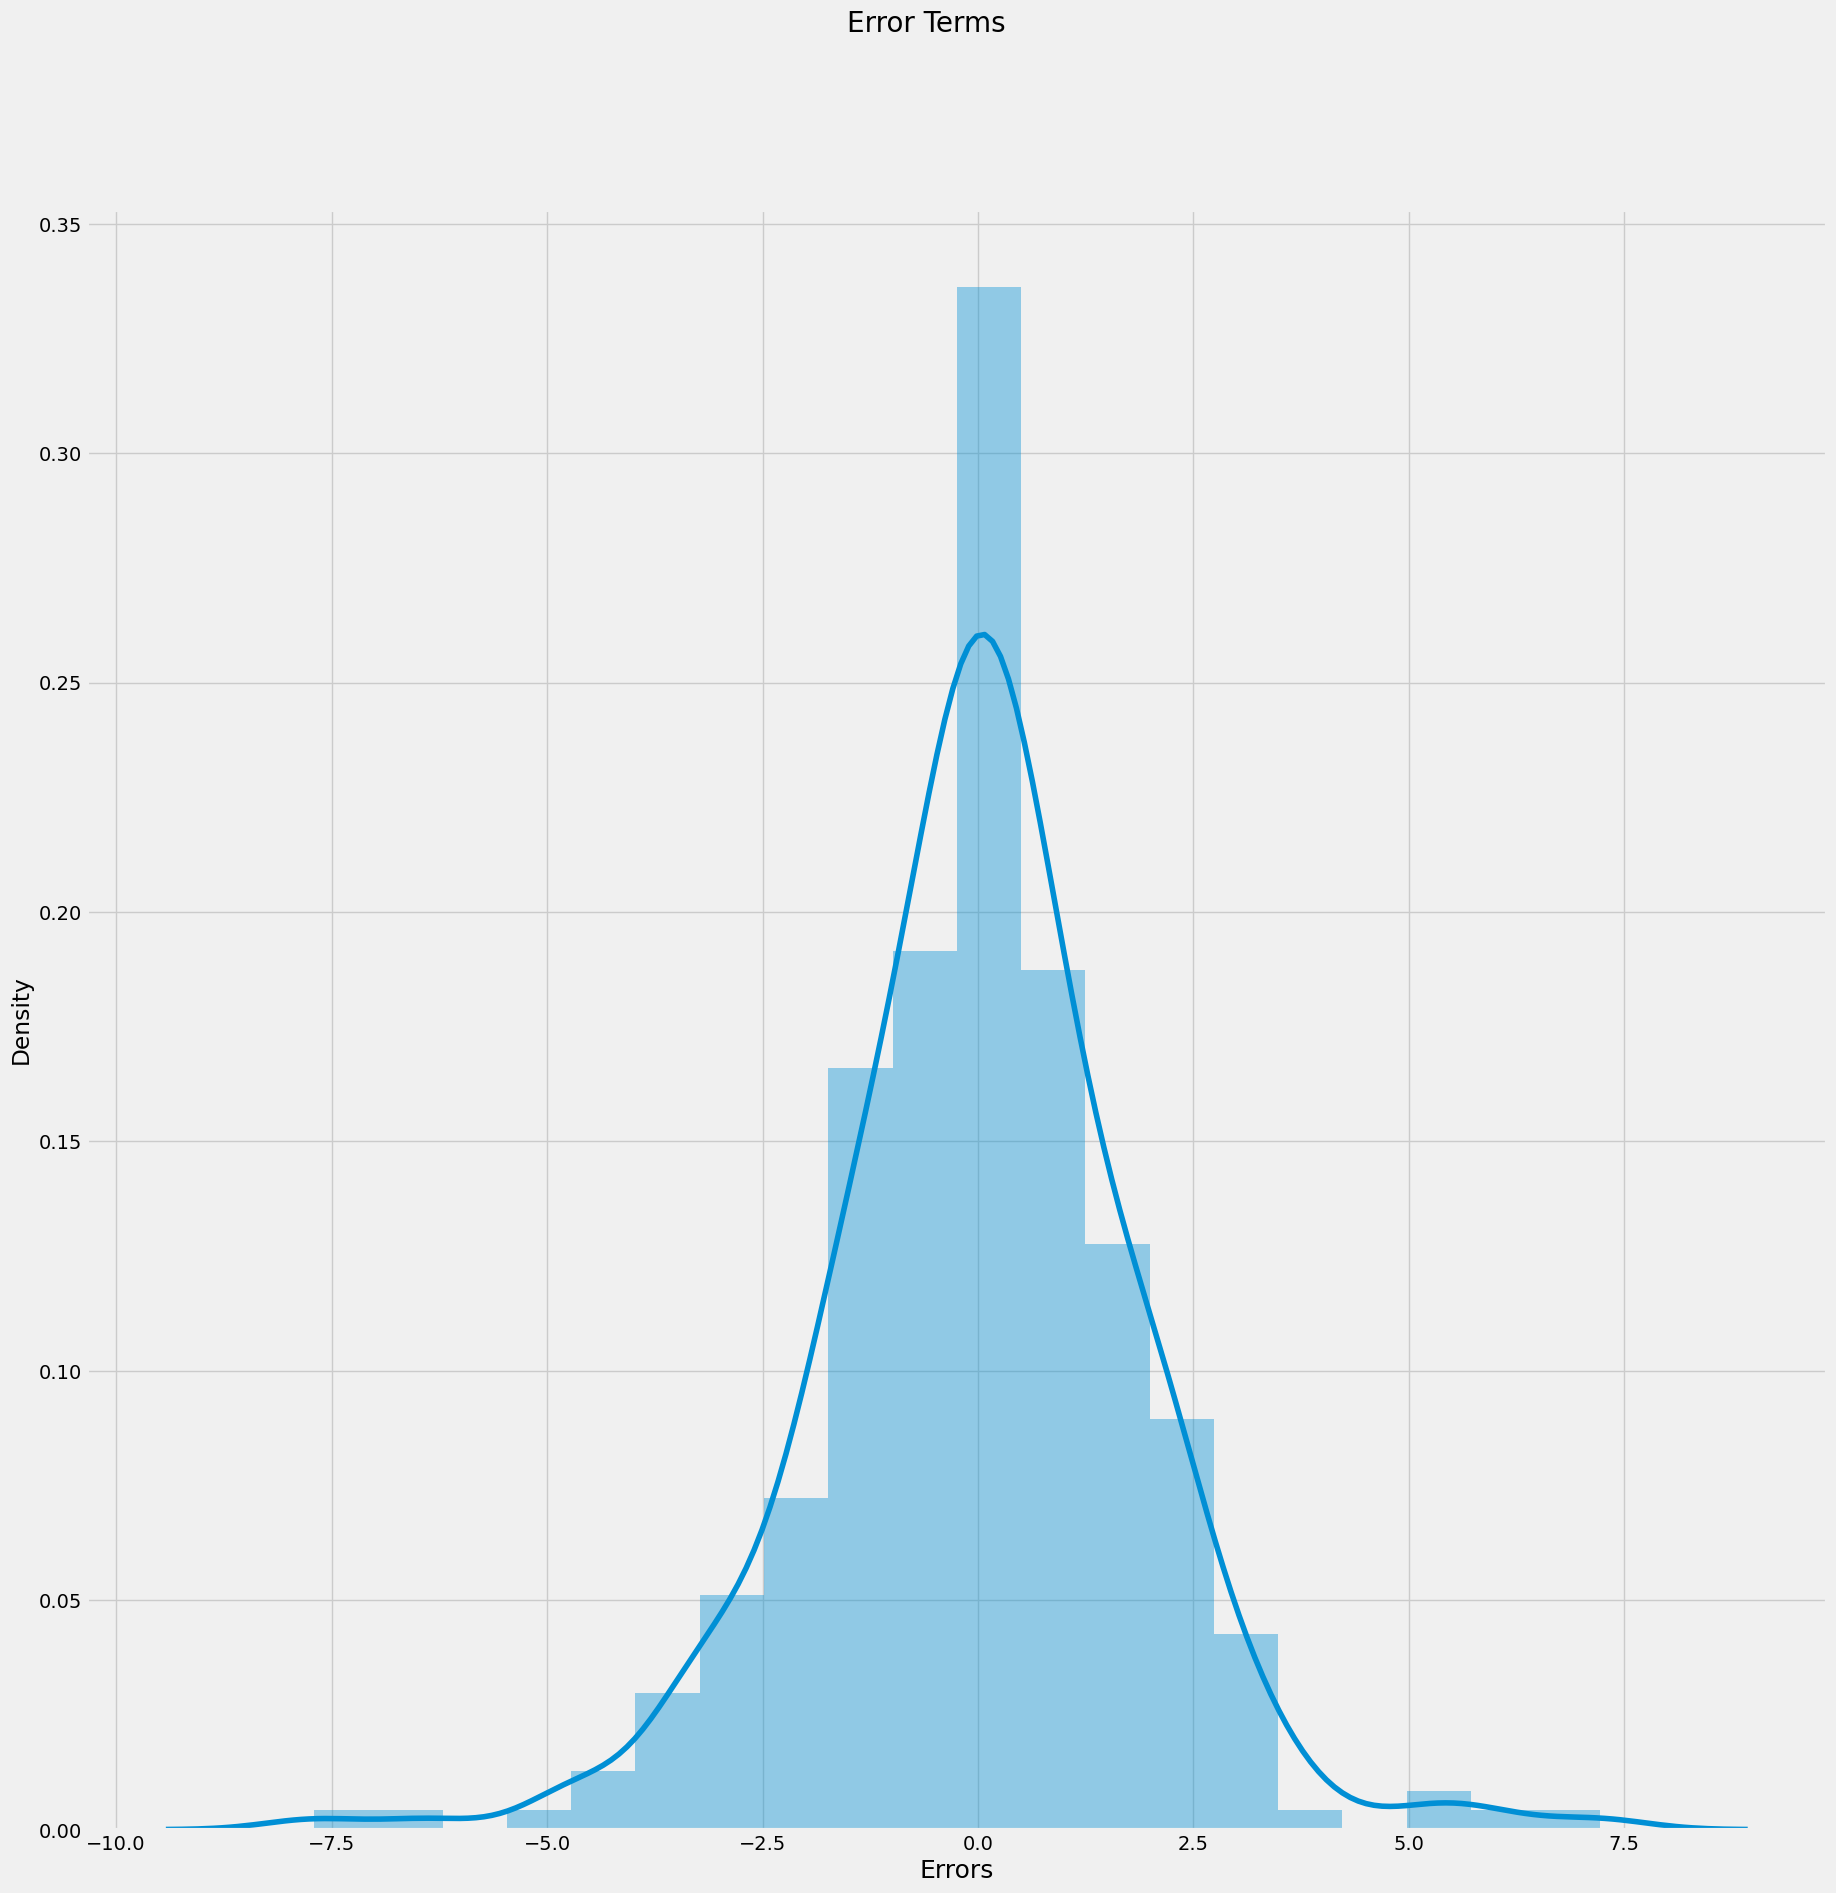

In [123]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle("Error Terms", fontsize = 20)                 
plt.xlabel("Errors", fontsize = 18)     

In [124]:
X_test = sm.add_constant(X_test)

In [125]:
X_test_rfe = X_test[X_train_rfe.columns]

In [126]:
y_pred = lm.predict(X_test_rfe)

In [127]:
lm_RSquared = r2_score(y_test, y_pred)

lm_Adj_RSquared = sm.OLS(y_test, sm.add_constant(y_pred)).fit().rsquared_adj

lm_MAE = metrics.mean_absolute_error(y_test, y_pred)

lm_MSE = metrics.mean_squared_error(y_test, y_pred)

lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [128]:
#Tabulate the results
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ["Model", "R-Squared", "Adj.R-Squared", "MAE", "MSE", "RMSE"]

# create a empty dataframe of the columns
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_model_metrics = pd.Series({"Model": "Linreg full model of target variable ",
                     "MAE":lm_MAE,
                     "MSE": lm_MSE,
                     "RMSE": lm_RMSE, 
                     "R-Squared":lm_RSquared,
                     "Adj.R-Squared":lm_Adj_RSquared     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels. If you want the concatenation to ignore existing
# indices, you can set the argument ignore_index=True. Then the resulting DataFrame
# index will be labeled with 0,1,2,....n-1.     
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation._append(linreg_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,R-Squared,Adj.R-Squared,MAE,MSE,RMSE
0,Linreg full model of target variable,0.998462,0.99852,2.003276,6.9508,2.636437


Decision Tree

In [129]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [130]:
y_pred = dt.predict(X_test)

In [131]:
dt_RSquared = r2_score(y_test, y_pred)

dt_Adj_RSquared = sm.OLS(y_test, sm.add_constant(y_pred)).fit().rsquared_adj

dt_MAE = metrics.mean_absolute_error(y_test, y_pred)

dt_MSE = metrics.mean_squared_error(y_test, y_pred)

dt_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [132]:
linreg_model_metrics = pd.Series({"Model": "Decision Tree",
                     "MAE":dt_MAE,
                     "MSE": dt_MSE,
                     "RMSE": dt_RMSE, 
                     "R-Squared":dt_RSquared,
                     "Adj.R-Squared":dt_Adj_RSquared 
                   })

result_tabulation = result_tabulation._append(linreg_model_metrics, ignore_index = True)

result_tabulation

,Model,R-Squared,Adj.R-Squared,MAE,MSE,RMSE
0,Linreg full model of target variable,0.998462,0.998520,2.003276,6.950800,2.636437
1,Decision Tree,-0.243654,0.430774,49.881071,5622.057988,74.980384


In [133]:
dt_prune = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2)
dt_prune.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [134]:
y_pred = dt_prune.predict(X_test)

In [135]:
dt_prune_RSquared = r2_score(y_test, y_pred)

dt_prune_Adj_RSquared = sm.OLS(y_test, sm.add_constant(y_pred)).fit().rsquared_adj

dt_prune_MAE = metrics.mean_absolute_error(y_test, y_pred)

dt_prune_MSE = metrics.mean_squared_error(y_test, y_pred)

dt_prune_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [136]:
linreg_model_metrics = pd.Series({"Model": "Decision Tree Pruned",
                     "MAE":dt_prune_MAE,
                     "MSE": dt_prune_MSE,
                     "RMSE": dt_prune_RMSE,
                     "R-Squared":dt_prune_RSquared,
                     "Adj.R-Squared":dt_prune_Adj_RSquared 
                   })

result_tabulation = result_tabulation._append(linreg_model_metrics, ignore_index = True)

result_tabulation

,Model,R-Squared,Adj.R-Squared,MAE,MSE,RMSE
0,Linreg full model of target variable,0.998462,0.998520,2.003276,6.950800,2.636437
1,Decision Tree,-0.243654,0.430774,49.881071,5622.057988,74.980384
2,Decision Tree Pruned,-0.285419,0.377584,50.431384,5810.862315,76.229012


In [137]:
param_grid = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [138]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [139]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score (neg_mean_squared_error): -21.67089647941943


In [140]:
dt_cv = grid_search.best_estimator_
y_pred = dt_cv.predict(X_test)

In [141]:
dt_cv_RSquared = r2_score(y_test, y_pred)

dt_cv_Adj_RSquared = sm.OLS(y_test, sm.add_constant(y_pred)).fit().rsquared_adj

dt_cv_MAE = metrics.mean_absolute_error(y_test, y_pred)

dt_cv_MSE = metrics.mean_squared_error(y_test, y_pred)

dt_cv_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [142]:
linreg_model_metrics = pd.Series({"Model": "Decision Tree GridSearchCV",
                     "MAE":dt_cv_MAE,
                     "MSE": dt_cv_MSE,
                     "RMSE": dt_cv_RMSE,
                     "R-Squared":dt_cv_RSquared,
                     "Adj.R-Squared":dt_cv_Adj_RSquared 
                   })

result_tabulation = result_tabulation._append(linreg_model_metrics, ignore_index = True)

result_tabulation

,Model,R-Squared,Adj.R-Squared,MAE,MSE,RMSE
0,Linreg full model of target variable,0.998462,0.998520,2.003276,6.950800,2.636437
1,Decision Tree,-0.243654,0.430774,49.881071,5622.057988,74.980384
2,Decision Tree Pruned,-0.285419,0.377584,50.431384,5810.862315,76.229012
3,Decision Tree GridSearchCV,-0.243608,0.413435,49.941219,5621.850055,74.978997


Random Forest

In [143]:
df_rt = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
df_rt.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [144]:
y_pred = df_rt.predict(X_test)

In [145]:
rt_RSquared = r2_score(y_test, y_pred)

rt_Adj_RSquared = sm.OLS(y_test, sm.add_constant(y_pred)).fit().rsquared_adj

rt_MAE = metrics.mean_absolute_error(y_test, y_pred)

rt_MSE = metrics.mean_squared_error(y_test, y_pred)

rt_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [146]:
linreg_model_metrics = pd.Series({"Model": "Random Forest",
                     "MAE":rt_MAE,
                     "MSE": rt_MSE,
                     "RMSE": rt_RMSE,
                     "R-Squared":rt_RSquared,
                     "Adj.R-Squared":rt_Adj_RSquared 
                   })

result_tabulation = result_tabulation._append(linreg_model_metrics, ignore_index = True)

result_tabulation

,Model,R-Squared,Adj.R-Squared,MAE,MSE,RMSE
0,Linreg full model of target variable,0.998462,0.998520,2.003276,6.950800,2.636437
1,Decision Tree,-0.243654,0.430774,49.881071,5622.057988,74.980384
2,Decision Tree Pruned,-0.285419,0.377584,50.431384,5810.862315,76.229012
3,Decision Tree GridSearchCV,-0.243608,0.413435,49.941219,5621.850055,74.978997
4,Random Forest,-0.259213,0.366034,48.824048,5692.396203,75.447970


In [147]:
svm_regressor = SVR(kernel="linear")

svm_regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [148]:
y_pred = svm_regressor.predict(X_test)

In [149]:
svm_RSquared = r2_score(y_test, y_pred)

svm_Adj_RSquared = sm.OLS(y_test, sm.add_constant(y_pred)).fit().rsquared_adj

svm_MAE = metrics.mean_absolute_error(y_test, y_pred)

svm_MSE = metrics.mean_squared_error(y_test, y_pred)

svm_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [150]:
linreg_model_metrics = pd.Series({"Model": "Support Vector Machine",
                     "MAE":svm_MAE,
                     "MSE": svm_MSE,
                     "RMSE": svm_RMSE,
                     "R-Squared":svm_RSquared,
                     "Adj.R-Squared":svm_Adj_RSquared 
                   })

result_tabulation = result_tabulation._append(linreg_model_metrics, ignore_index = True)

result_tabulation

,Model,R-Squared,Adj.R-Squared,MAE,MSE,RMSE
0,Linreg full model of target variable,0.998462,0.998520,2.003276,6.950800,2.636437
1,Decision Tree,-0.243654,0.430774,49.881071,5622.057988,74.980384
2,Decision Tree Pruned,-0.285419,0.377584,50.431384,5810.862315,76.229012
3,Decision Tree GridSearchCV,-0.243608,0.413435,49.941219,5621.850055,74.978997
4,Random Forest,-0.259213,0.366034,48.824048,5692.396203,75.447970
5,Support Vector Machine,0.998581,0.998623,1.908935,6.412569,2.532305


In [151]:
y=pd.concat([y_train,y_test],axis = 0)
y.reset_index(drop=True, inplace=True)
y.head()

0    523.085144
1    520.927063
2    510.480103
3    504.888733
4    514.747192
Name: Close, dtype: float64

In [152]:
y_Predict = lm.predict(X_train_rfe)
y_Predict1 = lm.predict(X_test_rfe)

Predict = pd.concat([y_Predict, y_Predict1], axis=0)
Predict.reset_index(drop=True, inplace=True)
Predict.head()

0    520.903446
1    523.639224
2    504.428405
3    506.635095
4    516.204941
dtype: float64

In [153]:
Frame = pd.DataFrame({"Actual":y,"Predicted":Predict})
Frame.tail()

,Actual,Predicted
389,772.049988,772.809314
390,783.950012,780.195483
391,783.900024,780.566016
392,788.049988,786.419618
393,773.700012,774.912356


In [154]:
Frame = pd.DataFrame({"Actual":y,"Predicted":Predict})
Frame.head()

,Actual,Predicted
0,523.085144,520.903446
1,520.927063,523.639224
2,510.480103,504.428405
3,504.888733,506.635095
4,514.747192,516.204941
